# TP 1

*Rappels d’optimisation, algorithme du gradient projeté, de Uzawa*

- - -

## I - Quelques rappels théoriques

$$
\text{ Soit } J \text { une application strictement convexe de } \mathbb{R}^{n} \text { à valeurs dans } \mathbb{R}, \text{convexe et semi-continue inférieurement. }
\text{Pour } k = 1,...,p, \text{on introduit les fonctions } g_k : \mathbb{R}^{n} → \mathbb{R}
$$

$\text{ supposées convexes semi-continues inférieurement. L’ensemble des contraintes est défini par}$

$$
C=u \in \mathbb{R}^{n} | g_{k}(u) \leq 0, \quad k=1, \ldots p \\
\text{ On veut étudier l’algorithme du gradient projeté pour résoudre le problème d’optimisation: }
\inf _{u \in C} J(u)
$$

### 1. Cet algorithme est très souvent difficile à mettre en œuvre en raison de la projection sur l'ensemble des contraintes.
* Tout d'abord, elle exige des évaluations et des comparaisons supplémentaires des fonctions, ce qui peut prendre beaucoup de temps si ces fonctions sont compliquées.
* De plus, il n'est parfois pas du tout trivial de définir la projection car l'ensemble des contraintes peut prendre des formes très irrégulières.

### 2. Le problème de min-max
*On voudrait montrer que le problème ci-dessus est équivalent à un problème de min-max.*


On note le problème initial $\mathcal{(P)}$:

$$
\mathcal{(P)}\quad\quad \begin{cases}\inf _{u \in C} J(u) \\
C=u \in \mathbb{R}^{n} | g_{k}(u) \leq 0, \quad k=1, \ldots p 
\end{cases}
$$

Alors, a ce point-là, grâce à la théorie de la dualité lagrangienne, on peut définir le Lagrangien associé au problème $\mathcal{P}$:

$$
    \begin{aligned} L: H^1_0(0, l) \times L^2(0, l, \mathbb{R}_+) \rightarrow \mathbb{R} \\(u, \lambda) \mapsto L(u ; \lambda) &=J(u)+\int_{0}^{l} (\underbrace{\lambda}_{\text{ mult.} \\ \text{associé}} \quad \underbrace{g(u)}_{\text{contrainte} \\ \text{p.p. dans } L^2})dx = J(u) + \langle\lambda, g(u)\rangle_{L_2}\end{aligned}
$$

On définit également le point-selle du Lagrangien. Soit $\bar{u} \in H^1_0(0, l) \text { et } \bar{\lambda} \in L^2(0, l, \mathbb{R}_+) $, le point 
$(\bar{u}, \bar{\lambda})$ est un point-selle du Lagrangien si:


$$
\left\{\begin{array}{ll}{\forall \lambda \in L^2(0, l, \mathbb{R}_+) } & {L(\bar{u} ; \lambda) \leq L(\bar{u} ; \bar{\lambda})} \\ {\forall u \in H^1_0(0, l) ,} & {L(u ; \bar{\lambda}) \geq L(\bar{u} ; \bar{\lambda})}\end{array}\right.
$$


Maintenant, par le théorème de dualité lagrangienne (qu'on a vu pendant le cours de l'Optimisation de S2) on peut dire que le point $(\bar{u}, \bar{\lambda})$ est un point-selle du Lagrangien si et seulement si :

*$(i)\quad \bar{u}$ est solution du problème primal $\mathcal{P}$.*

*$(ii) \quad (\bar{u}, \bar{\lambda})$ est solution du problème dual.*

*$(iii) \quad$ le saut de dualité est nul ou 
$\sup _{\lambda \in \mathbb{R}_+^{p}}\left(\inf _{u \in \mathbb{R}^{n}} L(u ; \lambda)\right)=\inf _{u \in \mathbb{R}^{n}}\left(\sup _{\lambda \in \mathbb{R_+}^{p}} L(u ; \lambda)\right)$*
$$
$$


Alors, ce théorème permet nous constater que

$$
\begin{aligned} J(\bar{u}) &=\inf _{u \in C} J(u)=\inf _{u \in H^1_0(0, l) } L(u ; \bar{\lambda}) \\ &=\operatorname{sup}_{\lambda \in L^2(0, l, \mathbb{R}_+) }(\inf _{u \in H^1_0(0, l) } L(u ; \lambda))=\inf _{u \in H^1_0(0, l) }(\sup _{\lambda \in L^2(0, l, \mathbb{R}_+)  } L(u ; \lambda)) \end{aligned} \\
$$
Ce qu'on appelle aussi un problème min-max ou max-min. 
On en conclut que trouver $\bar{u}$ tel que $\bar{u}$  résout $\mathcal{(P)}$ est équivalent à trouver un couple $(\bar{u}, \bar{\lambda})$ qui résout le problème min-max ci-dessus.

***Remarque I:*** Il convient de dire qu'en général, il faut vérifier que les contraintes sont admissibles. Cependant, dans notre cas $g_k(u)$ sont convexes, semi-continues inférieurement, ainsi les contraintes sont qualifiées.

***Remarque II:*** En outre, on peut noter que si le problème direct correspond plutôt à la portée de l'algorithme de gradient projeté en termes de résolution numérique, le problème reformulé est, en fait, ce que l'on peut essayer de résoudre numériquement en utilisant l'algorithme d'Uzawa. Une étape de l'algorithme d'Uzawa est décrite ci-dessous :

$$
\begin{array}{l}{u^{k+1} = argmin _{v \in C}\left\{J(v)+\sum_{i=1}^{p} \lambda_{i}^{k} g_{i}(v)\right\}} \\ {\lambda_{i}^{k+1}=\max \left\{\lambda_{i}^{k}+\rho g_{i}\left(u^{k+1}\right), 0\right\}}\end{array}
$$

On le fait en boucle, jusqu'à ce que le nombre maximum d'itérations soit atteint ou jusqu'à $||u^{k+1} - u^{k}|| < \varepsilon_{tol}$, où $\varepsilon_{tol}$ est le niveau de tolérance.

## II -  Un problème d’obstacle

$\text{Soit } \ell > 0 \text { et } f \in L^{2}(0,\ell).  \text { On considère la fonctionnelle } J \text { définie sur } H_{0}^{1}(0,\ell) \text{ par:}$
$$
J(u)=\frac{1}{2} \int_{0}^{\ell} u^{\prime}(x)^{2} d x-\int_{0}^{\ell} f(x) u(x) d x
$$
$\text{ainsi que l'ensemble de contraintes :}$

$$
C=\{u \in H_{0}^{1}(0,1) | u(x) \leq h(x) \text { p.p. dans } ] 0,1 [ \}
\\
$$

$ \text { où } h \text { désigne une fonction strictement positive donnée dans } C^{0}(] 0,1[). $



### 1. On souhaite montrer que si *u* résout le problème $\mathcal{(P)}$, alors 

il résout le problème aux limites suivant:


$$
(\Psi)\quad\quad \left\{\begin{array}{ll}{-u^{\prime \prime}(x)=f(x)-\lambda} & {x \in] 0, 1[} \\ {u(0)=u(\ell)=0} \\ {u(x) \leq h(x)} \\ {\lambda \geq 0, \lambda(u(x)-h(x))=0} & {x \in] 0, 1[}\end{array}\right.
$$

En I.2 nous avons vu que si $\bar{u}$ résout le pb $\mathcal{(P)}$, c'est un point selle de $L$. Alors,

$$
    \nabla_u L(\bar{u}, \bar{\lambda}) = 0
$$

Calculons le différentiel en de $L(\bar{u}, \bar{\lambda})$ en $u$ dans la direction $\delta u$:

$$
D_u L(\bar{u}, \bar{\lambda}) = \lim_{\varepsilon \rightarrow 0} \frac{L(\bar{u} + \varepsilon \delta u, \bar{\lambda}) - L(\bar{u}, \bar{\lambda})}{\varepsilon} = \int_0^l u'(\delta u)' - \int_0^l f\delta u + \int_0^l \lambda \delta u \\ 
(*) \quad\quad \int_0^l u'(\delta u)' - \int_0^l f\delta u + \int_0^l \lambda \delta u  = 0, \quad \forall \delta u \in H^1_0(0, l)
$$

Maintenant, par formule de Green, $(*)$ se réécrit, comme:
$$
    -\int_0^l \delta u u'' + \underbrace{\left [ (\delta u) u' \right]_0^l}_{= 0, \text{ car } \delta u \\ \in H^1_0(0, l)} - \int_0^l f\delta u + \int_0^l \lambda \delta u  = 0
$$

En outre, prenant en compte la condition de complémentarité, qui signifie que soit $\lambda = 0$ si on est à l'intérieur de l'ensemble des solutions possibles, soit $g(u) = u(x) - h(x) = 0$ si on est au bord de l'ensemble, on constate que si $\bar{u}$ résout le problème $\mathcal{(P)}$, il résout également le problème suivant: 

> $$-u'' = f - \lambda$$
> $$u \in H^1_0(0, l)$$
> $$u \leq h, \quad p.p. $$ 
> $$\lambda \geq 0, \quad  p.p.$$
> $$ \lambda(u-h) = 0, \quad p.p.$$

ou bien le problème $(\Psi$).


### 2. & 3. On veut maintenant résoudre ce problème en utilisant deux méthodes: 
 * un algorithme de type Uzawa 
 * un algorithme de type gradient projeté

In [0]:
# imports
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')

In [0]:
# la discretisation
l = 1
N = 100

# gradient numérique
def gradient(func, X, epsilon = 0.000001):
    N = len(X)
    grad = np.zeros(N)
    Xeps = np.zeros(N)
    for i in range(N):
        Xeps[i] = epsilon
        grad[i] = (func(X + Xeps) - func(X - Xeps))/(2*epsilon)
        Xeps[i] = 0
    return grad

def gradient_H1_0(func, X, epsilon = 0.000001):
    N = len(X)
    grad = np.zeros(N)
    Xeps = np.zeros(N)
    for i in range(1, N-1):
        Xeps[i] = epsilon
        grad[i] = (func(X + Xeps) - func(X - Xeps))/(2*epsilon)
        Xeps[i] = 0
    return grad

# fonctions auxiliaires
def obstacle_0(x):
    return 0.88*np.log(1 + x)

def obstacle_1(x):
    return 1/2 - (x-1/2)**2


def obstacle_2(x):
    return np.minimum(x, 1-x) 

def obstacle_3(x):
    return 0.12*np.minimum(x, 1-x) 

def force(x):
    return np.cos(x)

def force_1(x):
    return 42*np.log(42*x + 1)

def force_2(x):
    return (1-x)*x

def projection(X, C):
    return np.minimum(X, C)

def projection_ada(X, C):
    return np.maximum(X, C)

# fonction à minimiser
def J(u):
    x = np.linspace(0, l, N)
    return 1/2*np.sum((np.gradient(u)/(l/(N-1)))**2) - u@force(x)

def J_A(u):
    x = np.linspace(0, l, N)
    return 1/2*np.sum((np.gradient(u)/(l/(N-1)))**2) - u@force_2(x)

def J_Y(u):
    x = np.linspace(0, l, N)
    return 1/2*np.sum((np.gradient(u)/(l/(N-1)))**2) - u@force_1(x)

### Vérification des fonctions introduites

In [0]:
# initialisation de u
u0 = np.ones(N)*.25
J(u0)

-21.01876758470039

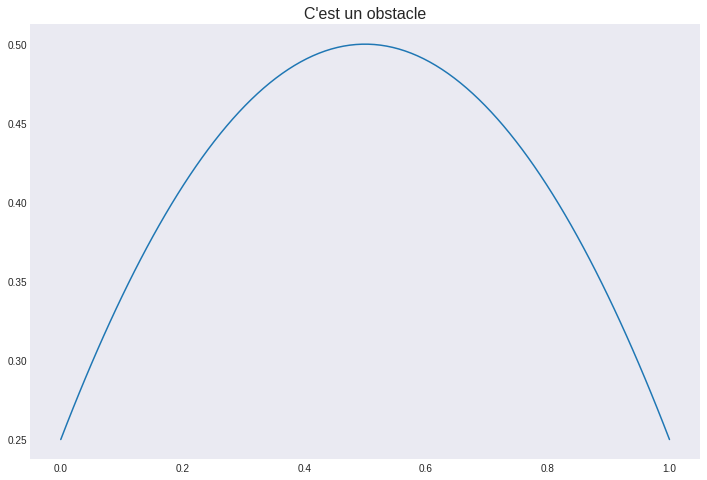

In [0]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
xx = np.array(np.linspace(0, l, N))

plt.title("C'est un obstacle", fontsize=16)
plt.plot(xx, obstacle_1(xx));

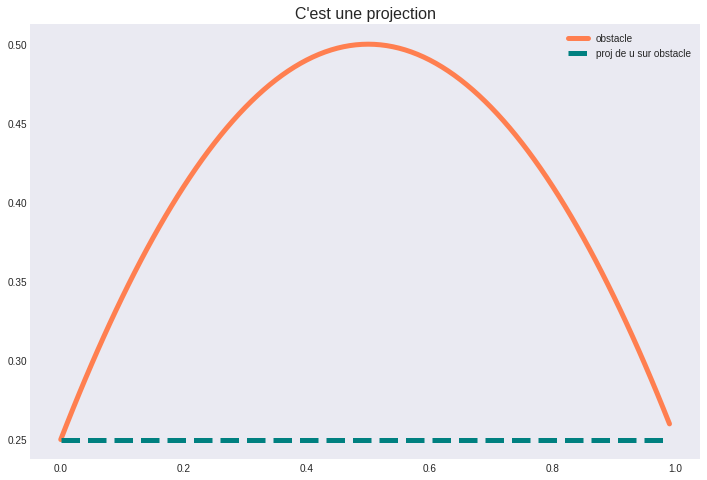

In [0]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
xx = np.array(np.arange(0, l, l/N))

plt.title("C'est une projection", fontsize=16)
plt.plot(xx, obstacle(xx), linewidth=5, label='obstacle', color='coral');
plt.plot(xx, projection(u0, obstacle(xx)), '--', linewidth=5, label='proj de u sur obstacle', color='teal');
plt.legend();

- - -
***Commentaire:*** On confirme que les fonctions marchent correctement.
- - -

## Gradient projeté

In [0]:
def Gradient_Proj(N, p, x0, func, obstacle, epsilon = 0.001, Iterations = 4004, 
                  plot = False, print_epoch = 10):
    # initialisation
    x_old = np.random.normal(size = N)
    x_new = x0
    i = 0
    route = [func(x0)]
    routeX = np.array([x0])
    
    # espace de travail
    space = np.array(np.linspace(0, l, N))
    # evaluation de l'obstacle
    obs = obstacle(space)

    
    # la boucle principal
    while np.linalg.norm(x_old-x_new) > epsilon and i < Iterations:
        x_old = np.copy(x_new)           
        d = -1*gradient_H1_0(func, x_old)
        x_new = x_old + p*d
        x_new = projection(x_new, obs)
        
        route.append(func(x_new))
        routeX = np.concatenate((routeX, [x_new]))
        i+=1
        if i%print_epoch == 0:
            print("[Minimization epoch {:d}] >>> target function value is {:.4f}.".format(i, route[i]))
    
    # plot pour voir la route du gradient
    if plot:
        i+=1
        # on calcule les erreurs sur chaque pas
        errors = np.zeros(i)
        for k in range(i):
            errors[k] = np.linalg.norm(routeX[k] - x_new)      
        
        xx = np.arange(0, i, 1)
        
        fig,axs = plt.subplots(2, 1, figsize = (12, 6), dpi = 128, sharex = True)
        axs[0].set_title("Valeurs de la fonctionnelle "
                         "évaluée à chaque pas de gradient projeté")
        axs[0].plot(xx, route, "--", color = "coral", linewidth = 2)
        axs[1].set_title("Erreurs - Log scale")
        axs[1].set_yscale("log")
        axs[1].plot(xx, errors, "--", color = "teal", linewidth = 2)
        plt.xlabel("Iteration");
    
    return x_new, route

### Minimisation avec gradient projeté

#### Test 1 - Pour les fonctions J, force, obstacle_1

In [0]:
# initialisation de u
u0 = np.random.normal(size = N)
u0[0] = u0[-1] = 0

[Minimization epoch 100] >>> target function value is 26.0560.
[Minimization epoch 200] >>> target function value is 15.6344.
[Minimization epoch 300] >>> target function value is 11.4330.
[Minimization epoch 400] >>> target function value is 8.5765.
[Minimization epoch 500] >>> target function value is 6.3893.
[Minimization epoch 600] >>> target function value is 4.6525.
[Minimization epoch 700] >>> target function value is 3.2524.
[Minimization epoch 800] >>> target function value is 2.1152.
[Minimization epoch 900] >>> target function value is 1.1881.
[Minimization epoch 1000] >>> target function value is 0.4306.
[Minimization epoch 1100] >>> target function value is -0.1891.
[Minimization epoch 1200] >>> target function value is -0.6964.
[Minimization epoch 1300] >>> target function value is -1.1117.
[Minimization epoch 1400] >>> target function value is -1.4519.
[Minimization epoch 1500] >>> target function value is -1.7305.
[Minimization epoch 1600] >>> target function value is -

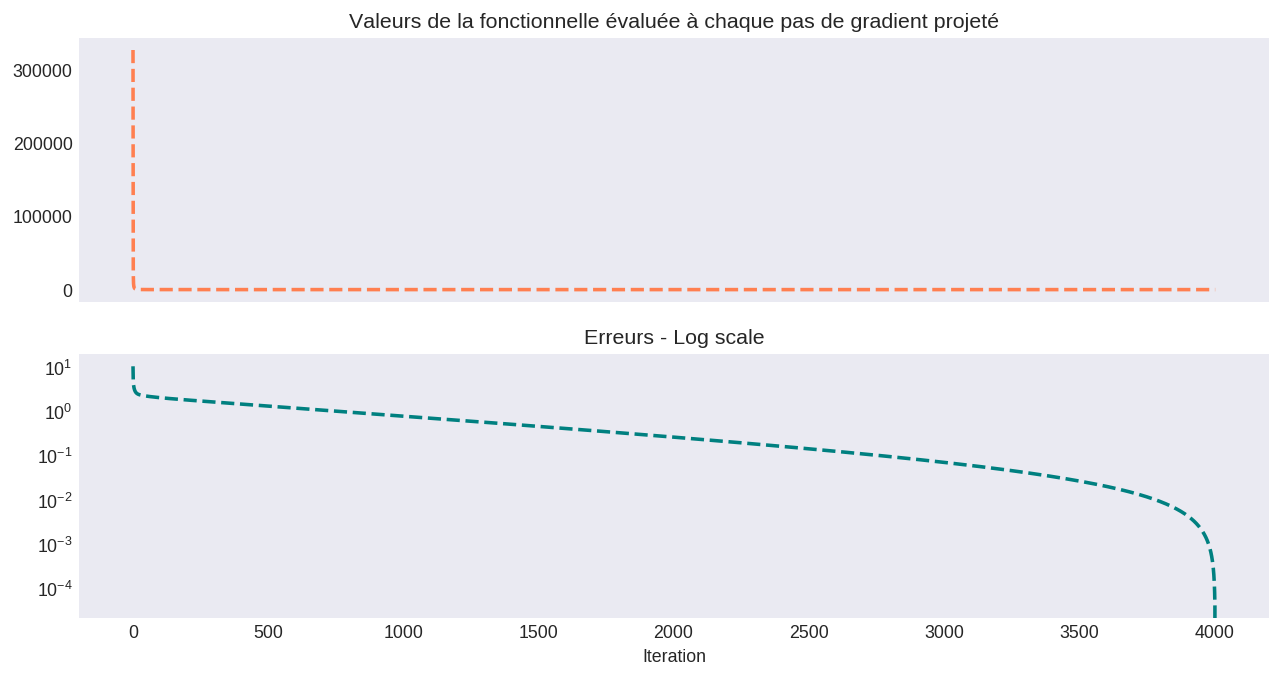

In [0]:
lr = 0.0001
u_opt, js = Gradient_Proj(N, lr, u0, J, obstacle_1, epsilon = 1e-5, 
                          print_epoch=100, Iterations = 4004, plot = True)

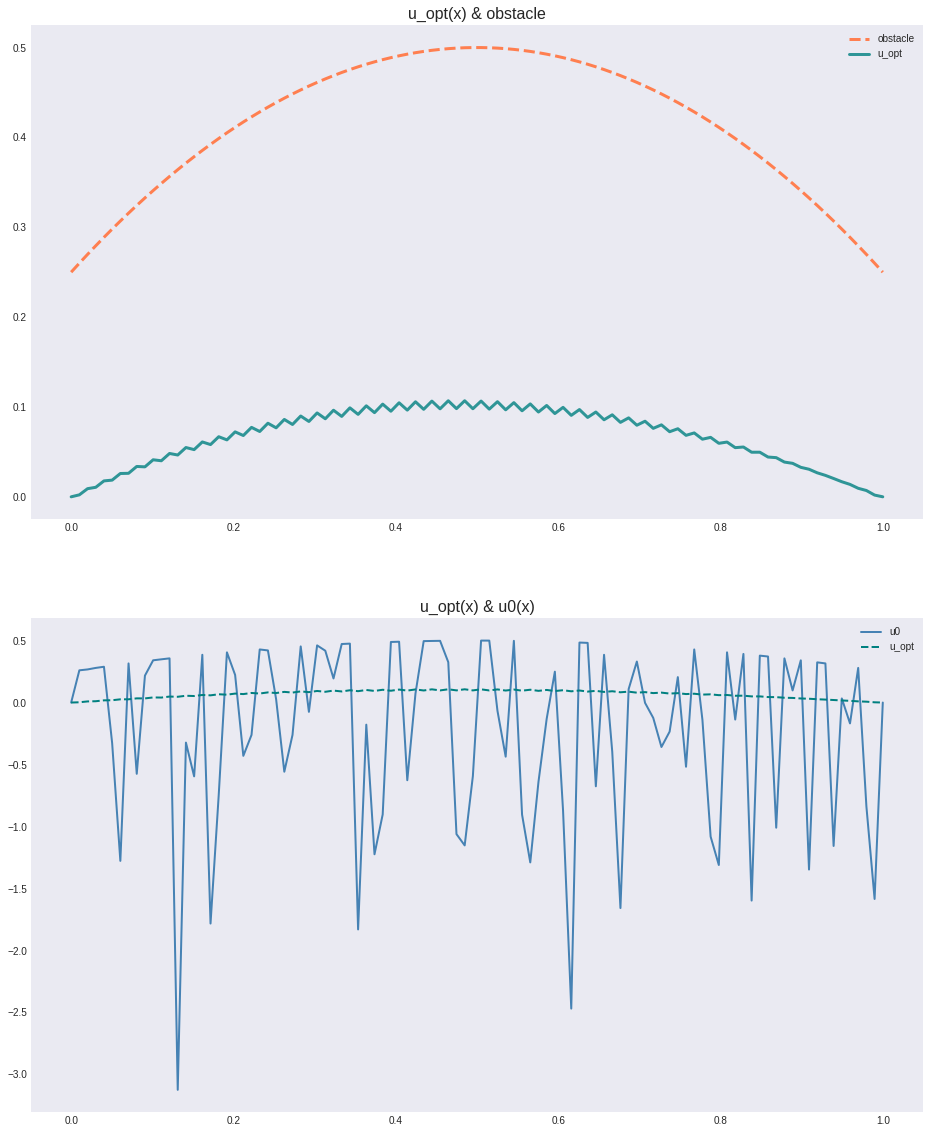

In [0]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 20))
xx = np.array(np.linspace(0, l, N))

ax1.set_title("u_opt(x) & obstacle", fontsize=16)
ax1.plot(xx, obstacle_1(xx), "--", linewidth=3, label='obstacle', color='coral');
ax1.plot(xx, u_opt, linewidth=3, label='u_opt', color='teal', alpha=0.8);
ax1.legend();

ax2.set_title("u_opt(x) & u0(x)", fontsize=16)
ax2.plot(xx, projection(u0, obstacle_1(xx)), linewidth=2, label='u0', color='steelblue');
ax2.plot(xx, u_opt, "--", linewidth=2, label='u_opt', color='teal');
ax2.legend();

[Minimization epoch 100] >>> target function value is 35.4395.
[Minimization epoch 200] >>> target function value is 23.4423.
[Minimization epoch 300] >>> target function value is 17.8520.
[Minimization epoch 400] >>> target function value is 13.9486.
[Minimization epoch 500] >>> target function value is 10.8631.
[Minimization epoch 600] >>> target function value is 8.3541.
[Minimization epoch 700] >>> target function value is 6.3019.
[Minimization epoch 800] >>> target function value is 4.6212.
[Minimization epoch 900] >>> target function value is 3.2445.
[Minimization epoch 1000] >>> target function value is 2.1168.
[Minimization epoch 1100] >>> target function value is 1.1929.
[Minimization epoch 1200] >>> target function value is 0.4361.
[Minimization epoch 1300] >>> target function value is -0.1838.
[Minimization epoch 1400] >>> target function value is -0.6917.
[Minimization epoch 1500] >>> target function value is -1.1078.
[Minimization epoch 1600] >>> target function value is -

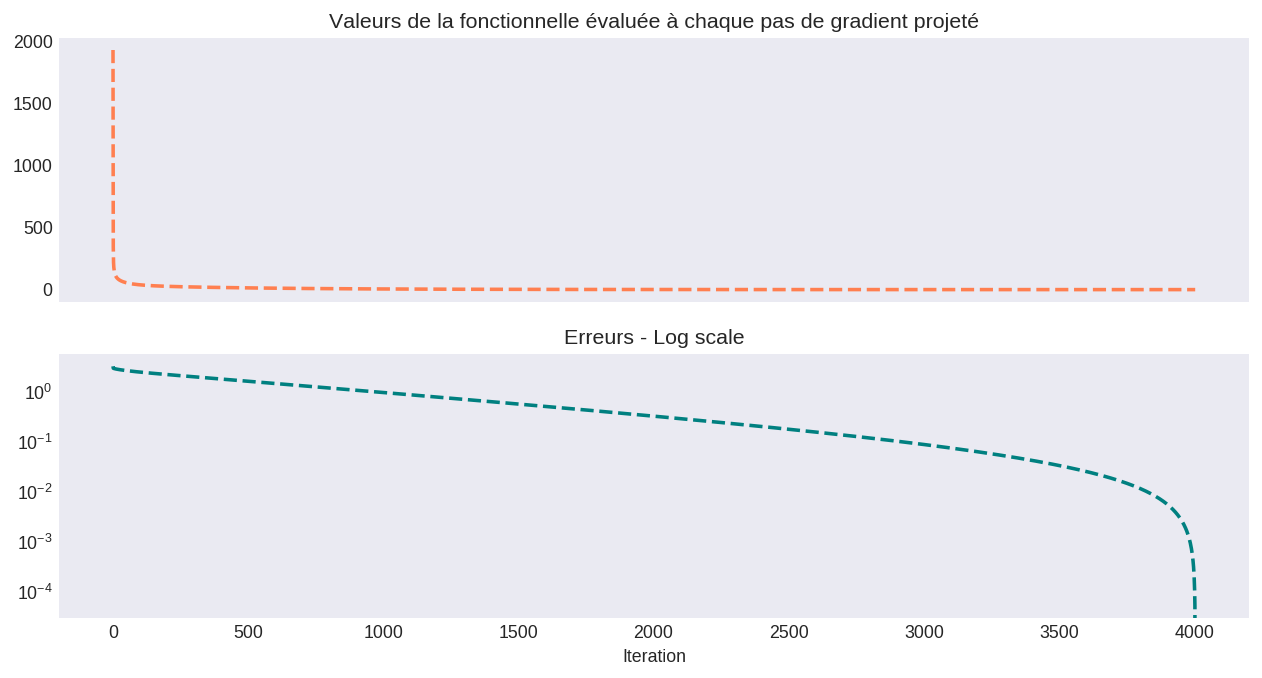

In [0]:
# on initialise u0 autrement
u0 = np.ones(N)*0.4
u0[0] = u0[-1] = 0
lr = 0.0001
u_opt, js = Gradient_Proj(N, lr, u0, J, obstacle_1, epsilon = 1e-5, 
                          print_epoch=100, Iterations = 4004, plot = True)

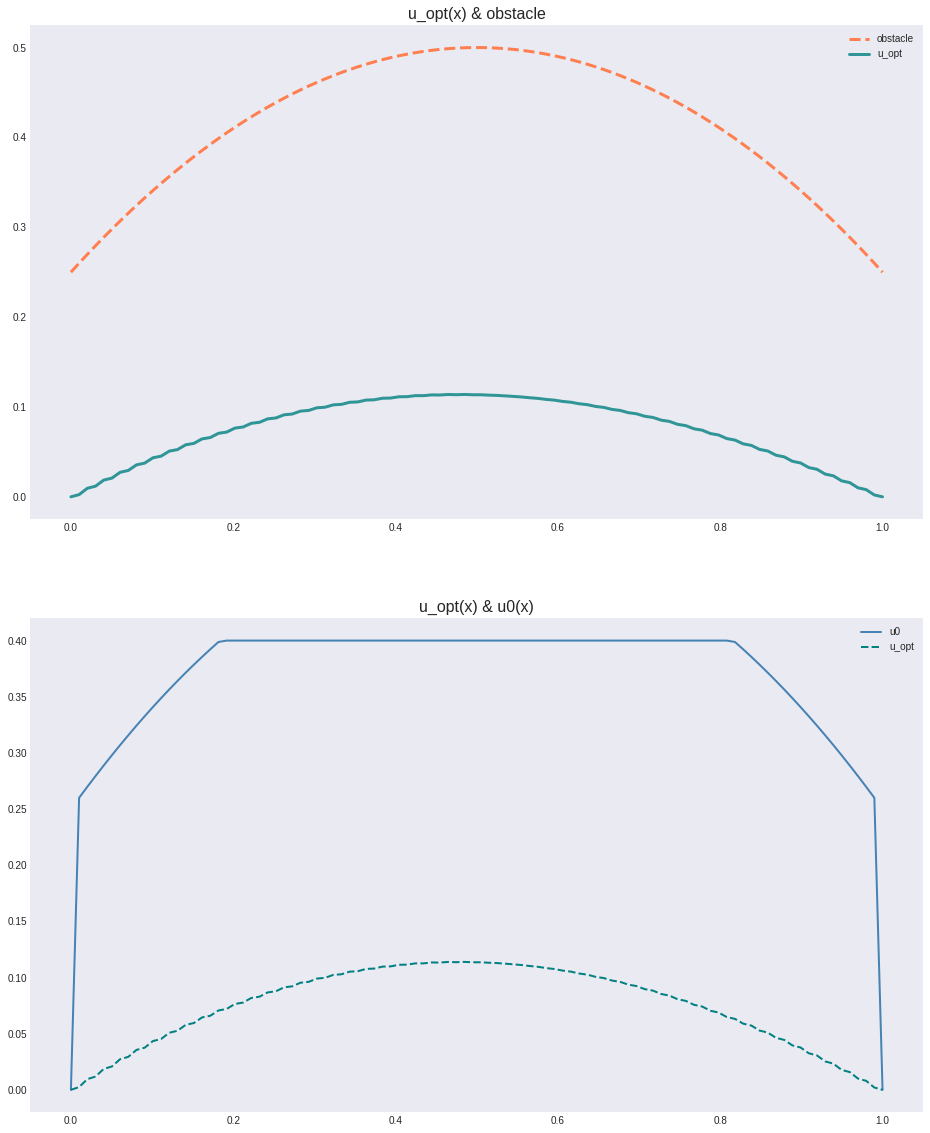

In [0]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 20))
xx = np.array(np.linspace(0, l, N))

ax1.set_title("u_opt(x) & obstacle", fontsize=16)
ax1.plot(xx, obstacle_1(xx), "--", linewidth=3, label='obstacle', color='coral');
ax1.plot(xx, u_opt, linewidth=3, label='u_opt', color='teal', alpha=0.8);
ax1.legend();

ax2.set_title("u_opt(x) & u0(x)", fontsize=16)
ax2.plot(xx, projection(u0, obstacle_1(xx)), linewidth=2, label='u0', color='steelblue');
ax2.plot(xx, u_opt, "--", linewidth=2, label='u_opt', color='teal');
ax2.legend();

#### Test 2 - Pour les fonctions J, force, obstacle_2

In [0]:
# initialisation de u
u0 = np.ones(N)*.4
u0[0] = u0[-1] = 0

[Minimization epoch 100] >>> target function value is 12.6918.
[Minimization epoch 200] >>> target function value is 9.5259.
[Minimization epoch 300] >>> target function value is 7.1866.
[Minimization epoch 400] >>> target function value is 5.3305.
[Minimization epoch 500] >>> target function value is 3.8226.
[Minimization epoch 600] >>> target function value is 2.5896.
[Minimization epoch 700] >>> target function value is 1.5800.
[Minimization epoch 800] >>> target function value is 0.7531.
[Minimization epoch 900] >>> target function value is 0.0758.
[Minimization epoch 1000] >>> target function value is -0.4791.
[Minimization epoch 1100] >>> target function value is -0.9336.
[Minimization epoch 1200] >>> target function value is -1.3059.
[Minimization epoch 1300] >>> target function value is -1.6109.
[Minimization epoch 1400] >>> target function value is -1.8608.
[Minimization epoch 1500] >>> target function value is -2.0654.
[Minimization epoch 1600] >>> target function value is -2

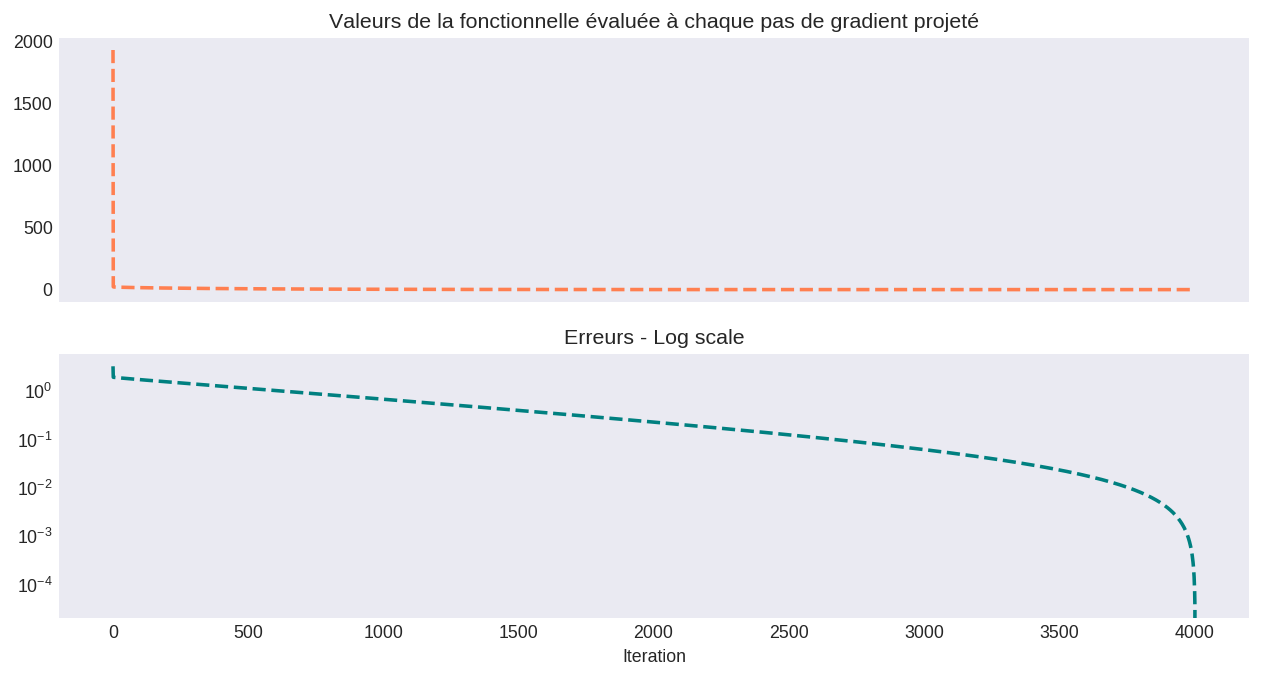

In [0]:
lr = 0.0001
u_opt, js = Gradient_Proj(N, lr, u0, J, obstacle_2, epsilon = 1e-5, 
                          print_epoch=100, Iterations = 4004, plot = True)

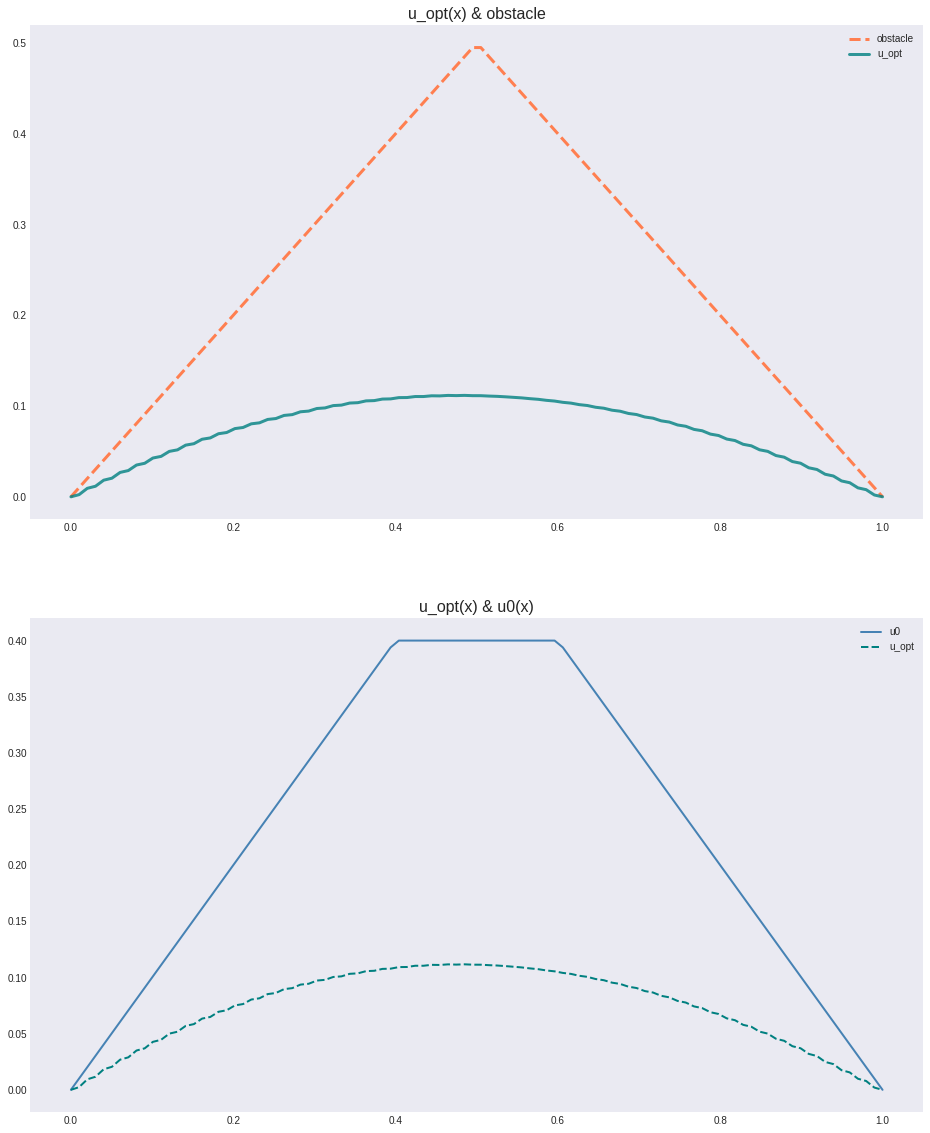

In [0]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 20))
xx = np.array(np.linspace(0, l, N))

ax1.set_title("u_opt(x) & obstacle", fontsize=16)
ax1.plot(xx, obstacle_2(xx), "--", linewidth=3, label='obstacle', color='coral');
ax1.plot(xx, u_opt, linewidth=3, label='u_opt', color='teal', alpha=0.8);
ax1.legend();

ax2.set_title("u_opt(x) & u0(x)", fontsize=16)
ax2.plot(xx, projection(u0, obstacle_2(xx)), linewidth=2, label='u0', color='steelblue');
ax2.plot(xx, u_opt, "--", linewidth=2, label='u_opt', color='teal');
ax2.legend();

#### Test 3 - Pour les fonctions J_A, force_2, obstacle_2

[Minimization epoch 100] >>> target function value is 2.3393.
[Minimization epoch 200] >>> target function value is 1.5498.
[Minimization epoch 300] >>> target function value is 1.1855.
[Minimization epoch 400] >>> target function value is 0.9323.
[Minimization epoch 500] >>> target function value is 0.7324.
[Minimization epoch 600] >>> target function value is 0.5698.
[Minimization epoch 700] >>> target function value is 0.4369.
[Minimization epoch 800] >>> target function value is 0.3280.
[Minimization epoch 900] >>> target function value is 0.2388.
[Minimization epoch 1000] >>> target function value is 0.1657.
[Minimization epoch 1100] >>> target function value is 0.1059.
[Minimization epoch 1200] >>> target function value is 0.0569.
[Minimization epoch 1300] >>> target function value is 0.0167.
[Minimization epoch 1400] >>> target function value is -0.0162.
[Minimization epoch 1500] >>> target function value is -0.0432.
[Minimization epoch 1600] >>> target function value is -0.0652

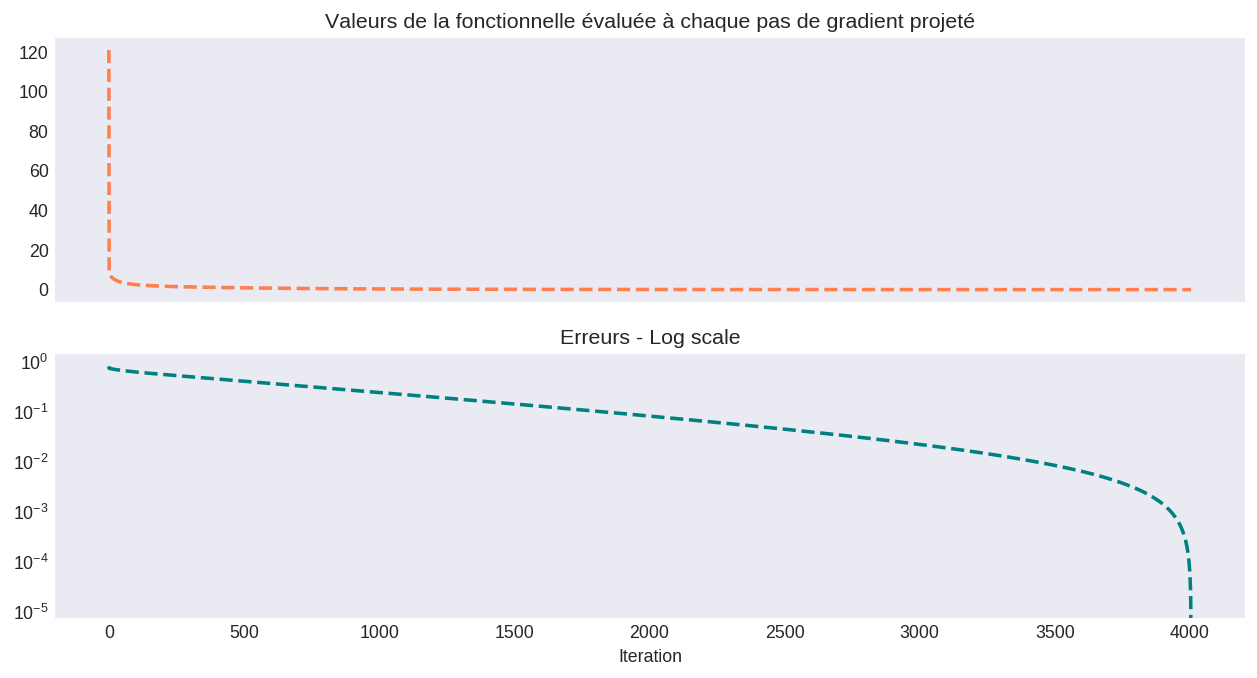

In [0]:
# initialisation de u
u0 = np.ones(N)*.1
u0[0] = u0[-1] = 0
lr = 0.0001
u_opt, js = Gradient_Proj(N, lr, u0, J_A, obstacle_2, epsilon = 1e-5,
                           print_epoch=100, Iterations = 4004, plot = True)

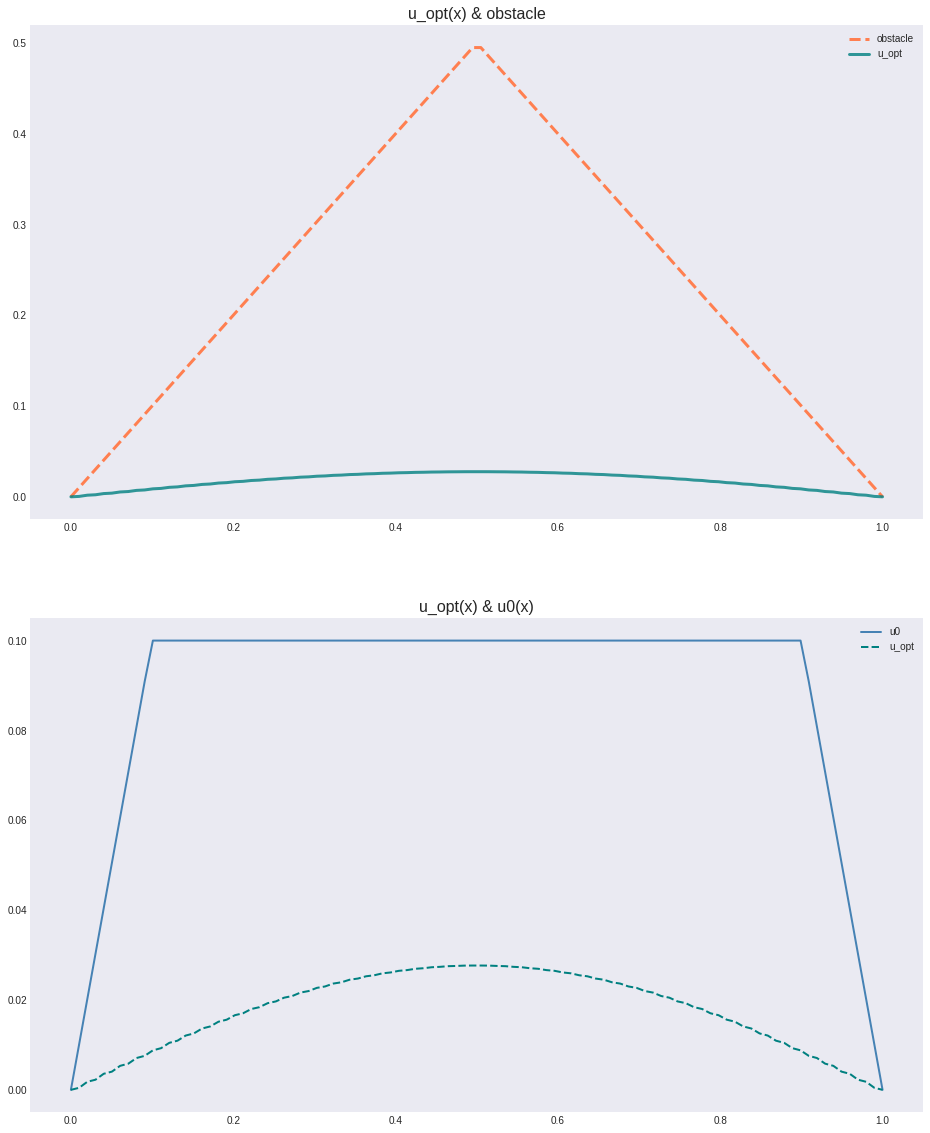

In [0]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 20))
xx = np.array(np.linspace(0, l, N))

ax1.set_title("u_opt(x) & obstacle", fontsize=16)
ax1.plot(xx, obstacle_2(xx), "--", linewidth=3, label='obstacle', color='coral');
ax1.plot(xx, u_opt, linewidth=3, label='u_opt', color='teal', alpha=0.8);
ax1.legend();

ax2.set_title("u_opt(x) & u0(x)", fontsize=16)
ax2.plot(xx, projection(u0, obstacle_2(xx)), linewidth=2, label='u0', color='steelblue');
ax2.plot(xx, u_opt, "--", linewidth=2, label='u_opt', color='teal');
ax2.legend();

#### Test 4 - Pour les fonctions J_Y, force_1, obstacle_0

[Minimization epoch 50] >>> target function value is -4015.6930.


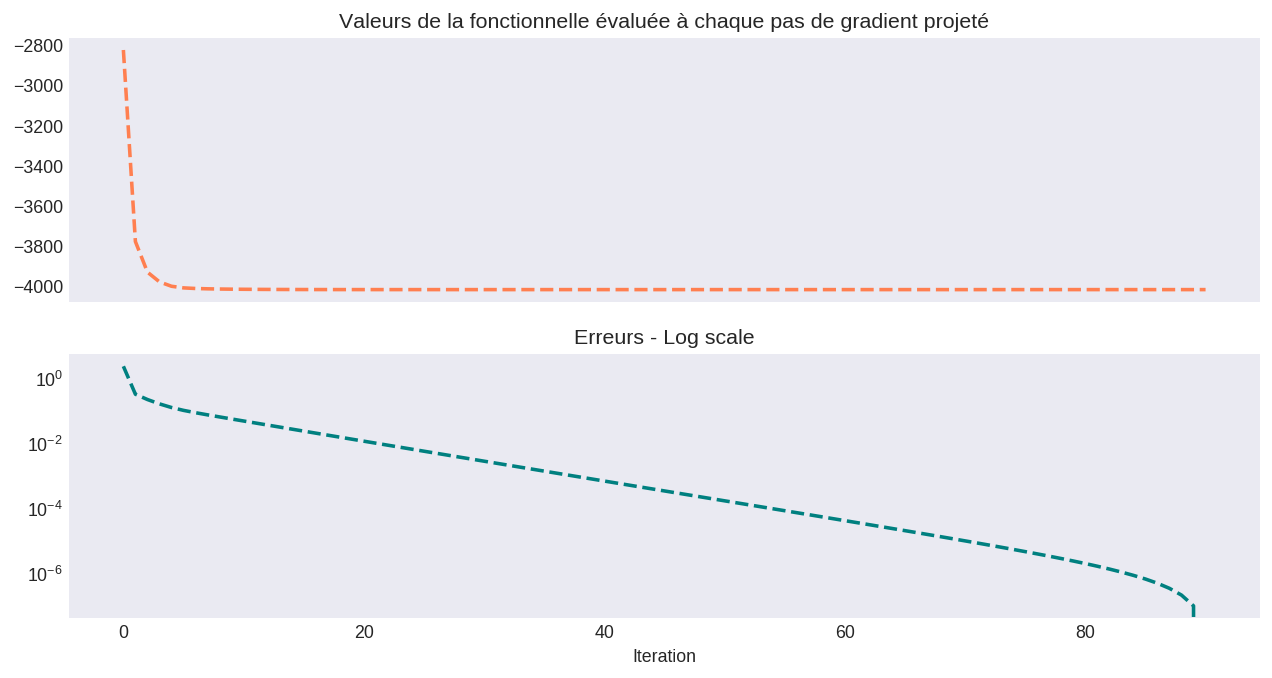

In [0]:
# initialisation de u
u0 = np.ones(N)*.5
u0[0] = u0[-1] = 0
lr = 0.0001
u_opt, js = Gradient_Proj(N, lr, u0, J_Y, obstacle_0, epsilon = 1e-7,
                           print_epoch=50, Iterations = 4004, plot = True)

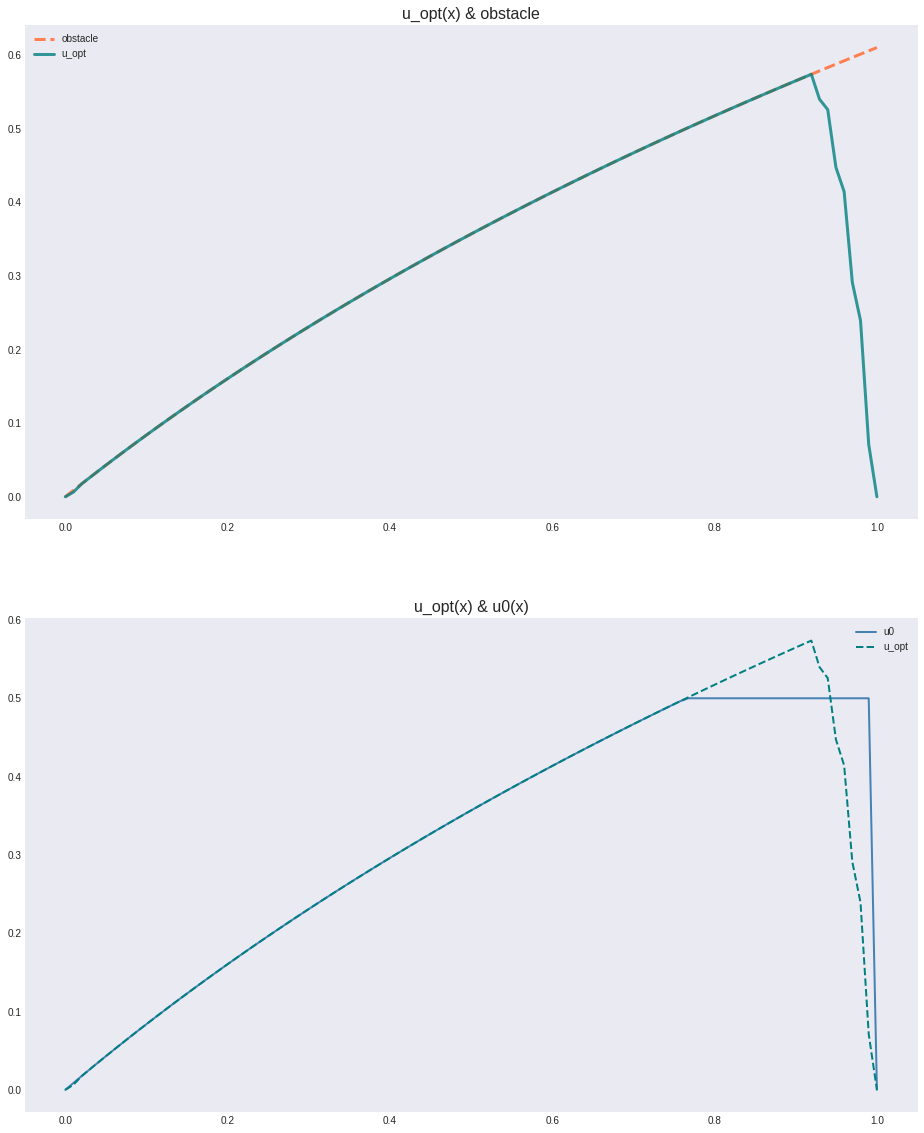

In [0]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 20))
xx = np.array(np.linspace(0, l, N))

ax1.set_title("u_opt(x) & obstacle", fontsize=16)
ax1.plot(xx, obstacle_0(xx), "--", linewidth=3, label='obstacle', color='coral');
ax1.plot(xx, u_opt, linewidth=3, label='u_opt', color='teal', alpha=0.8);
ax1.legend();

ax2.set_title("u_opt(x) & u0(x)", fontsize=16)
ax2.plot(xx, projection(u0, obstacle_0(xx)), linewidth=2, label='u0', color='steelblue');
ax2.plot(xx, u_opt, "--", linewidth=2, label='u_opt', color='teal');
ax2.legend();

***Commentaire:***
On peut dire que la convergence du gradient projeté est assez lente, et que la solution trouvée depend largement de u0, au moins dans le cadre de valeurs pas si grandes pour "MaxIterations". Cependant, les solutions obtenues sont les meilleures trouvées pour minimiser la fonction de coût $J$ ; elles satisfont également les contraintes. Ainsi, il semble que la méthode fonctionne correctement, cependant, nous allons vérifier les résultats obtenues en résolvant le problème avec la méthode d'Uzawa.

---
---

## Uzawa
*deux versions de la résolution par algorithme d'Uzawa sont proposées:*
1. Basée sur le problème direct $(\mathcal{P})$.
2. Basée sur le problème $(\mathcal{\Psi})$ introduit dans 1. de cette partie.

La première version est trop lente, car elle doit résoudre un sous-problème de minimisation à chaque étape de l'algorithme, ce qui prend beaucoup de temps.


In [0]:
import time

#### Version 1

In [0]:
def SectionDoreeForGradStep(func, X, d, a, b, Nmax, epsilon = 0):    
    
    r = (1 + np.sqrt(5))/2
    i = 0
    
    while np.abs(func(X + a*d) - func(X+b*d)) > epsilon and (i < Nmax):
        x1 = a + (b-a)/r**2
        x2 = a + (b-a)/r
        
        if func(X + x1*d) < func(X+x2*d):
            b = x2
        elif func(X + x1*d) > func(X+x2*d):
            a = x1
        else:
            a = x1
            b = x2 
        i+=1
            
    return a

def Gradient_descent_fixed(N, p, x0, func, 
                           epsilon=0.001, Iterations = 4004, plot = False):
    # initialisation
    x_old = np.random.normal(size = N)
    x_new = x0
    i = 0
    
    # la boucle principal
    while np.linalg.norm(x_old-x_new) > epsilon and i < Iterations:
        x_old = np.copy(x_new)           
        d = -1*gradient(func, x_old)
        x_new = x_old + p*d
        i+=1
    
    return x_new

def Gradient_descent_optimal(N, x0, func, 
                             epsilon=0.001, Iterations = 4004, plot = False):
    # initialisation
    x_old = np.random.normal(size = N)
    x_new = np.array(x0)
    i = 0
    
    # la boucle principal
    while np.linalg.norm(x_old-x_new) > epsilon and i < Iterations:
        x_old = np.copy(x_new)           
        d = -1*gradient(func, x_old)
        p = SectionDoreeForGradStep(func, x_old, d, -10, 10, 10000)
        x_new = x_old + p*d
        i+=1
    
    return x_new

In [0]:
def Uzawa(J, x0, Minimiser, obstacle, epsilon = 0.00001, Iterations = 44, plot = False):
    # initialisation
    N = len(x0)
    lambs = np.ones(N)
    # on adapt ro à N
    #ro = np.abs(J(x0))/np.linalg.norm(x0)
    ro = 0.0001
    i = 0
    x_old = np.random.normal(size = N)
    x_new = x0

    # espace de travail
    space = np.array(np.linspace(0, l, N))
    # evaluation de l'obstacle
    obs = obstacle(space)
    
    # on definit Lagrangien comme ci-dessous, 
    # pour qu'on puisse le passer aux autres fonction comme fonction à minimiser 
    def L(x):
        return J(x) + obs@lambs
    
    # pour plot
    route = [L(x0)]
    routeX = np.array([x0])
    try:
        # la boucle principal
        while i < Iterations and np.linalg.norm(x_new-x_old) > epsilon:
            x_old = np.copy(x_new)
            if Minimiser == Gradient_descent_fixed:
                x_new = Minimiser(N=N, p=0.000001, func=L, x0=x_old, plot=False,
                                Iterations=1000, epsilon=0.001)
            else:
                x_new = Minimiser(N=N, func=L, x0=x_old, plot=False,
                                Iterations=1000, epsilon=0.001)
            
            #lambs = np.maximum(lambs + ro*H(x_new, obs), 0)
            lambs = np.maximum(lambs + ro*obs, 0)

            route.append(L(x_new))
            routeX = np.concatenate((routeX, [x_new]))   
            i+=1


            print("[Minimization epoch {:d}] >>> target function value is {:.4f}.".format(i, route[i]))
    except KeyboardInterrupt:
        print("L'algorithme est arrêté à l'itération {:d}".format(i))
        
    # plot pour voir la route de la méthode
    if plot:
        i+=1
        # on calcule les erreurs sur chaque pas
        errors = np.zeros(i)
        for k in range(i):
            errors[k] = np.linalg.norm(routeX[k] - x_new)      
        
        xx = np.arange(0, i, 1)
        
        fig,axs = plt.subplots(2, 1, figsize = (12, 6), dpi =128, sharex = True)
        axs[0].set_title("Valeurs de la fonctionnelle "
                            "évaluée à chaque pas d'Uzawa")
        axs[0].plot(xx, route, "--", color = "coral", linewidth = 2)
        axs[1].set_title("Erreurs - Log scale")
        axs[1].set_yscale("log")
        axs[1].plot(xx, errors, "--", color = "teal", linewidth = 2)
        plt.xlabel("Iteration");
        
    return x_new, route

In [0]:
# initialisation de u
u0 = np.ones(N)*.25

[Minimization epoch 1] >>> target function value is -169.5222.
[Minimization epoch 2] >>> target function value is -183.2341.
[Minimization epoch 3] >>> target function value is -192.0639.
[Minimization epoch 4] >>> target function value is -195.7092.
[Minimization epoch 5] >>> target function value is -195.7241.
[Minimization epoch 6] >>> target function value is -195.7389.
[Minimization epoch 7] >>> target function value is -195.7538.
[Minimization epoch 8] >>> target function value is -195.7687.
[Minimization epoch 9] >>> target function value is -195.7835.
[Minimization epoch 10] >>> target function value is -195.7984.
[Minimization epoch 11] >>> target function value is -195.8133.
[Minimization epoch 12] >>> target function value is -195.8282.
[Minimization epoch 13] >>> target function value is -195.8430.
[Minimization epoch 14] >>> target function value is -195.8579.
[Minimization epoch 15] >>> target function value is -195.8728.
[Minimization epoch 16] >>> target function value

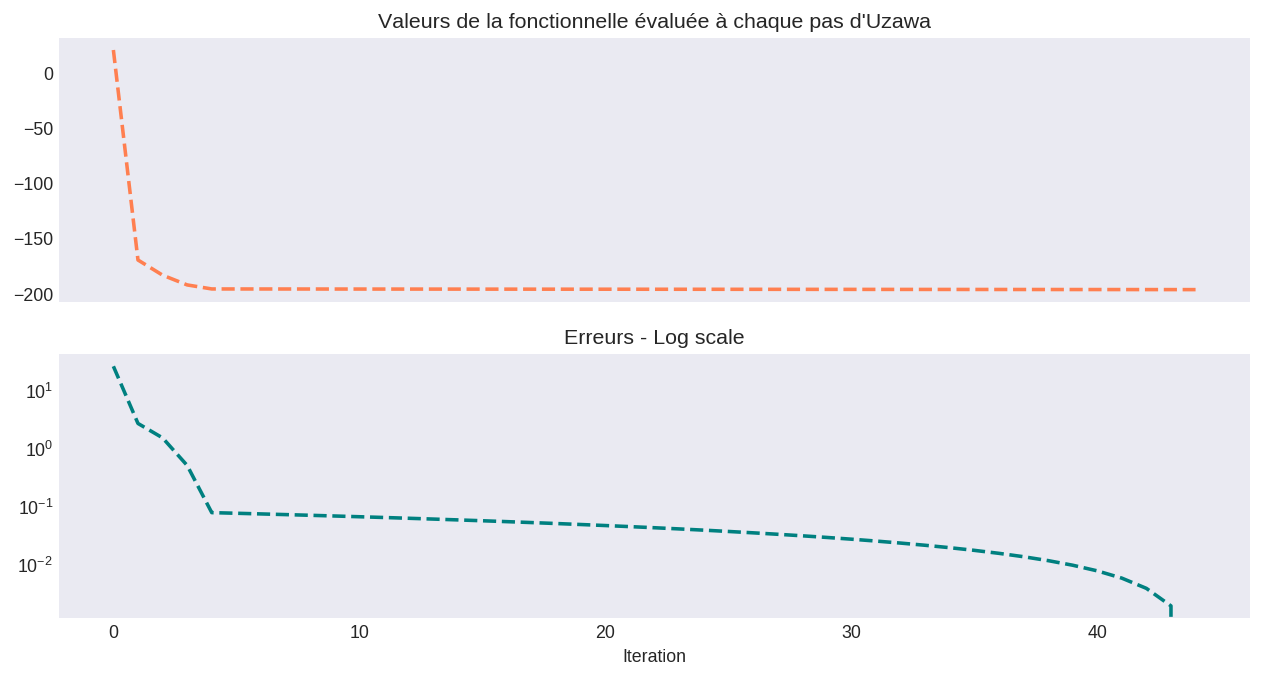

In [0]:
%%time

u_opt, js = Uzawa(J, u0, Gradient_descent_optimal, obstacle_1, epsilon = 0.001, plot=True)

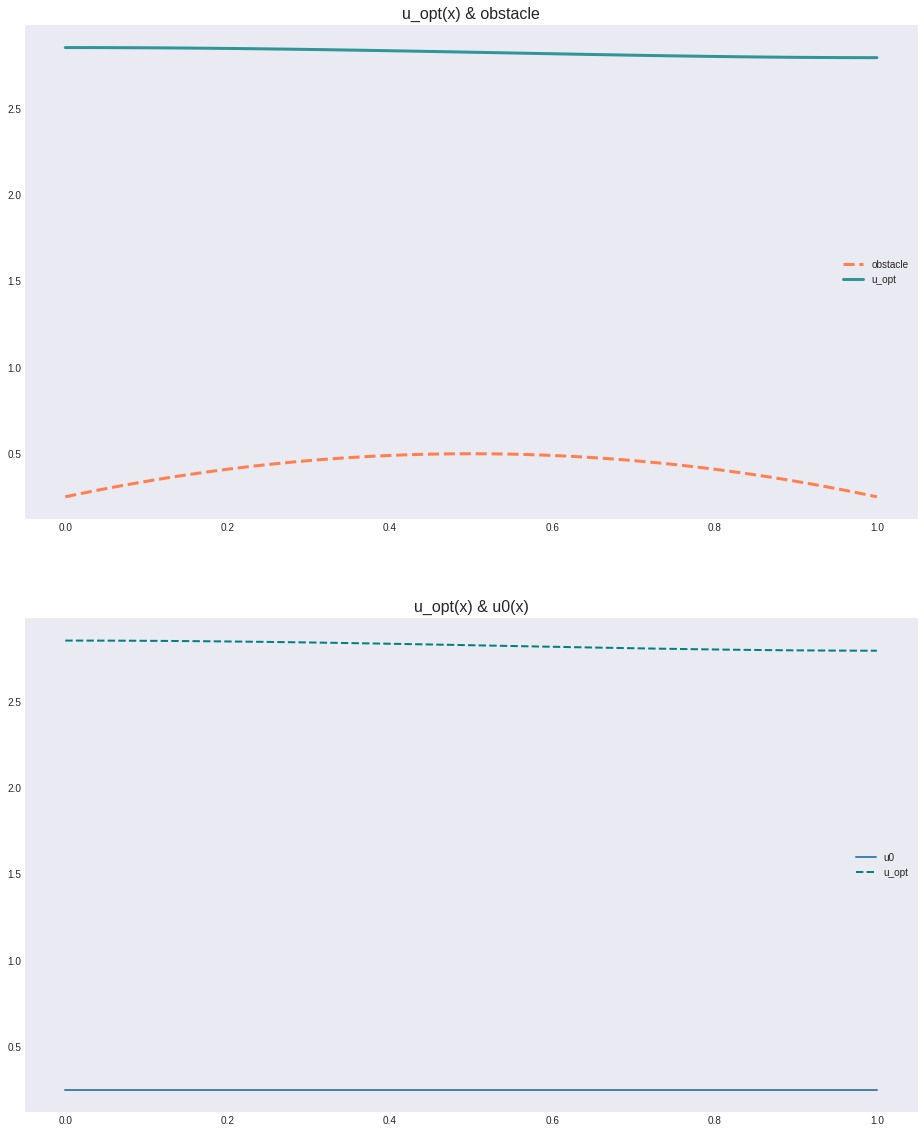

In [0]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 20))
xx = np.array(np.linspace(0, l, N))

ax1.set_title("u_opt(x) & obstacle", fontsize=16)
ax1.plot(xx, obstacle_1(xx), "--", linewidth=3, label='obstacle', color='coral');
ax1.plot(xx, u_opt, linewidth=3, label='u_opt', color='teal', alpha=0.8);
ax1.legend();

ax2.set_title("u_opt(x) & u0(x)", fontsize=16)
ax2.plot(xx, projection(u0, obstacle_1(xx)), linewidth=2, label='u0', color='steelblue');
ax2.plot(xx, u_opt, "--", linewidth=2, label='u_opt', color='teal');
ax2.legend();

***Commentaire:*** On peut voir, que l'algorithme a besoin de beaucoup de temps, mais ne converge pas. Donc, on devrait essayer une approche différente.
- - -

#### Version 2

In [0]:
def make_A(N, k1=-1, k2=2, k3=-1):
    a = np.ones(N-1) * k1
    b = np.ones(N) * k2
    c = np.ones(N-1) * k3
    return np.diag(a, -1) + np.diag(b, 0) + np.diag(c, 1)

A = make_A(N)
A /= ((l/(N-1))**2)
A

array([[19602., -9801.,     0., ...,     0.,     0.,     0.],
       [-9801., 19602., -9801., ...,     0.,     0.,     0.],
       [    0., -9801., 19602., ...,     0.,     0.,     0.],
       ...,
       [    0.,     0.,     0., ..., 19602., -9801.,     0.],
       [    0.,     0.,     0., ..., -9801., 19602., -9801.],
       [    0.,     0.,     0., ...,     0., -9801., 19602.]])

***Remarque:*** Pour trouver une bonne valeur (une valeur qui peut assurer la convergence) pour $\rho$ dans le cas de la fonctionnele quadratique, on peut utiliser l'inégalité suivante:

$$
0<\rho<\frac{2 \lambda_{1}(A)}{\|C\|^{2}}
$$

où $\lambda_{1}(A)$ est la plus petite valeur propre de $A$ et $C$ est la matrice de l'ensemble des contraintes du type $ Cv \leq d$, donc $C = Id$ dans notre cas.


In [0]:
eig, eig_vect = np.linalg.eig(A)
theoretic_good_ro = 2*np.min(eig)
print("rho doit être plus petite que ",theoretic_good_ro)

rho doit être plus petite que  18.96366902486347


In [0]:
def Uzawa_disc(A, x0, f, obstacle, epsilon = 1e-5, Iterations = 4004, 
               print_epoch=20, plot = False):
    # initialisation
    N = len(x0)
    lambs = np.ones(N)
    # on adapt ro à N
    #ro = np.abs(J(x0))/np.linalg.norm(x0)
    ro = 16
    i = 0
    x_old = np.random.normal(size = N)
    x_new = x0

    # espace de travail
    space = np.array(np.linspace(0, l, N))
    # evaluation de la force
    f_ev = f(space)
    # evaluation de l'obstacle
    obs = obstacle(space)

    A_inv = np.linalg.inv(A)

    def JB(x, l):
        return 1/2*np.linalg.norm(A@x - f_ev + l)**2
    
    # pour plot
    route = [JB(x0, lambs)]
    routeX = np.array([x0])
    try:
        # la boucle principal
        while i < Iterations and np.linalg.norm(x_new-x_old) > epsilon:
            x_old = np.copy(x_new)

            # min sur x
            x_new = A_inv@(f_ev - lambs)
            # max sur lambda
            lambs = np.maximum(lambs + ro*(x_new - obs), 0)

            route.append(JB(x_new, lambs))
            routeX = np.concatenate((routeX, [x_new]))   
            i+=1

            if i % print_epoch == 0:
                print("[Minimization epoch {:d}] >>> target function value is {:.4f}.".format(i, route[i]))
    except KeyboardInterrupt:
        print("L'algorithme est arrêté à l'itération {:d}".format(i))
        
    # plot pour voir la route de la méthode
    if plot:
        i+=1
        # on calcule les erreurs sur chaque pas
        errors = np.zeros(i)
        for k in range(i):
            errors[k] = np.linalg.norm(routeX[k] - x_new)      
        
        xx = np.arange(0, i, 1)
        
        fig,axs = plt.subplots(2, 1, figsize = (12, 6), dpi =128, sharex = True)
        axs[0].set_title("Valeurs de la fonctionnelle "
                            "évaluée à chaque pas d'Uzawa")
        axs[0].plot(xx, route, "--", color = "coral", linewidth = 2)
        axs[1].set_title("Erreurs - Log scale")
        axs[1].set_yscale("log")
        axs[1].plot(xx, errors, "--", color = "teal", linewidth = 2)
        plt.xlabel("Iteration");
        
    return x_new, route

#### Test 1 - Por les fonctions force, obstacle_1 et matrice A

CPU times: user 34.6 ms, sys: 32.8 ms, total: 67.4 ms
Wall time: 39.8 ms


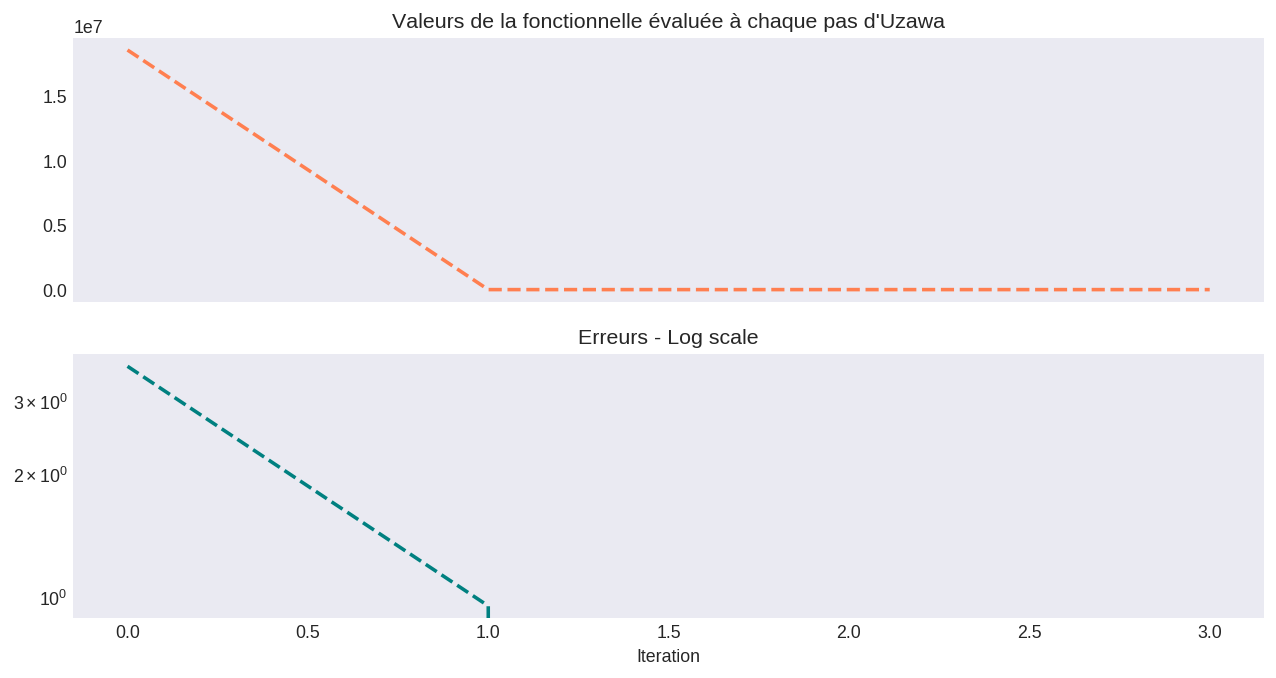

In [0]:
%%time
u0= np.ones(N)*0.44
u_opt, js = Uzawa_disc(A, u0, force, obstacle_1, epsilon = 1e-7, 
                       plot=True, print_epoch=100)

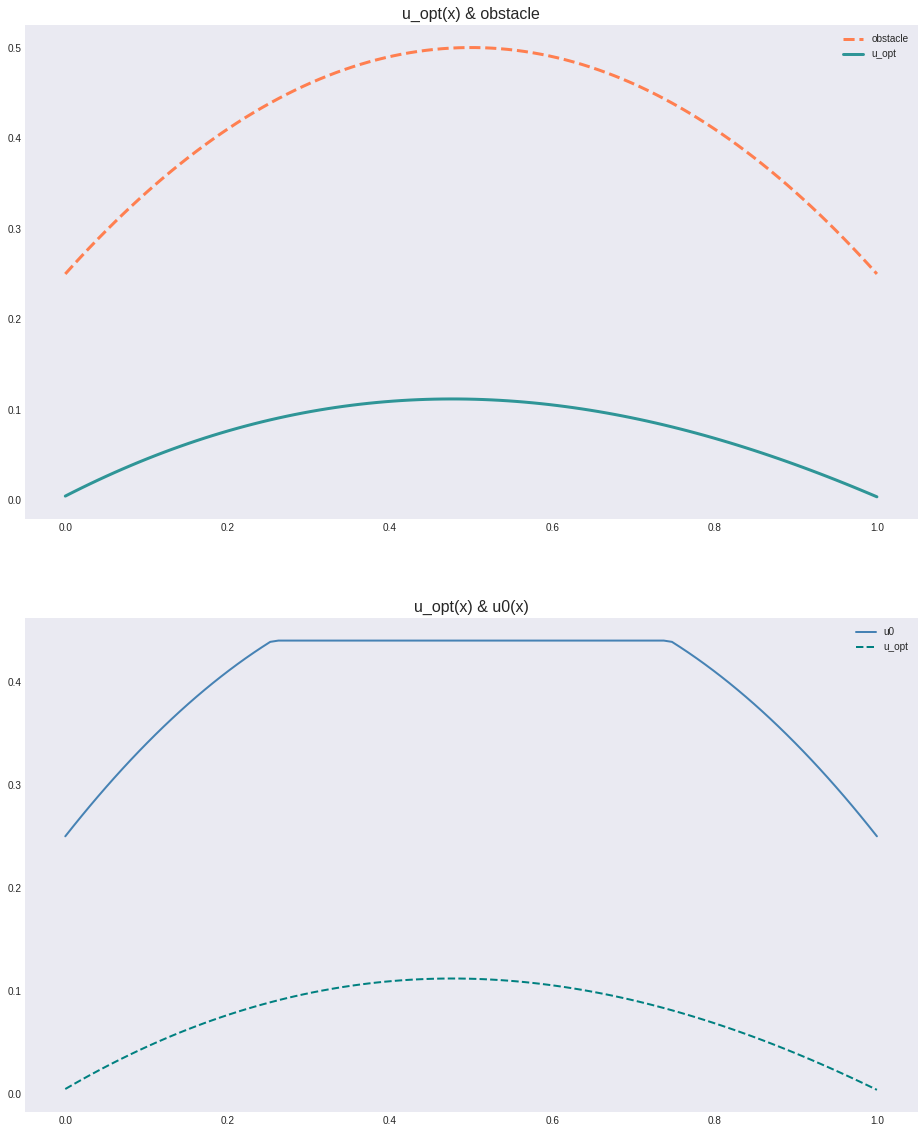

In [0]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 20))
xx = np.array(np.linspace(0, l, N))

ax1.set_title("u_opt(x) & obstacle", fontsize=16)
ax1.plot(xx, obstacle_1(xx), "--", linewidth=3, label='obstacle', color='coral');
ax1.plot(xx, u_opt, linewidth=3, label='u_opt', color='teal', alpha=0.8);
ax1.legend();

ax2.set_title("u_opt(x) & u0(x)", fontsize=16)
ax2.plot(xx, projection(u0, obstacle_1(xx)), linewidth=2, label='u0', color='steelblue');
ax2.plot(xx, u_opt, "--", linewidth=2, label='u_opt', color='teal');
ax2.legend();

#### Test 2 - Por les fonctions force, obstacle_2 et matrice A

[Minimization epoch 20] >>> target function value is 0.0052.
[Minimization epoch 40] >>> target function value is 0.0042.
[Minimization epoch 60] >>> target function value is 0.0038.
[Minimization epoch 80] >>> target function value is 0.0035.
[Minimization epoch 100] >>> target function value is 0.0033.
[Minimization epoch 120] >>> target function value is 0.0031.
[Minimization epoch 140] >>> target function value is 0.0029.
[Minimization epoch 160] >>> target function value is 0.0027.
[Minimization epoch 180] >>> target function value is 0.0025.
[Minimization epoch 200] >>> target function value is 0.0024.
[Minimization epoch 220] >>> target function value is 0.0022.
[Minimization epoch 240] >>> target function value is 0.0021.
[Minimization epoch 260] >>> target function value is 0.0020.
[Minimization epoch 280] >>> target function value is 0.0018.
[Minimization epoch 300] >>> target function value is 0.0017.
[Minimization epoch 320] >>> target function value is 0.0016.
[Minimizatio

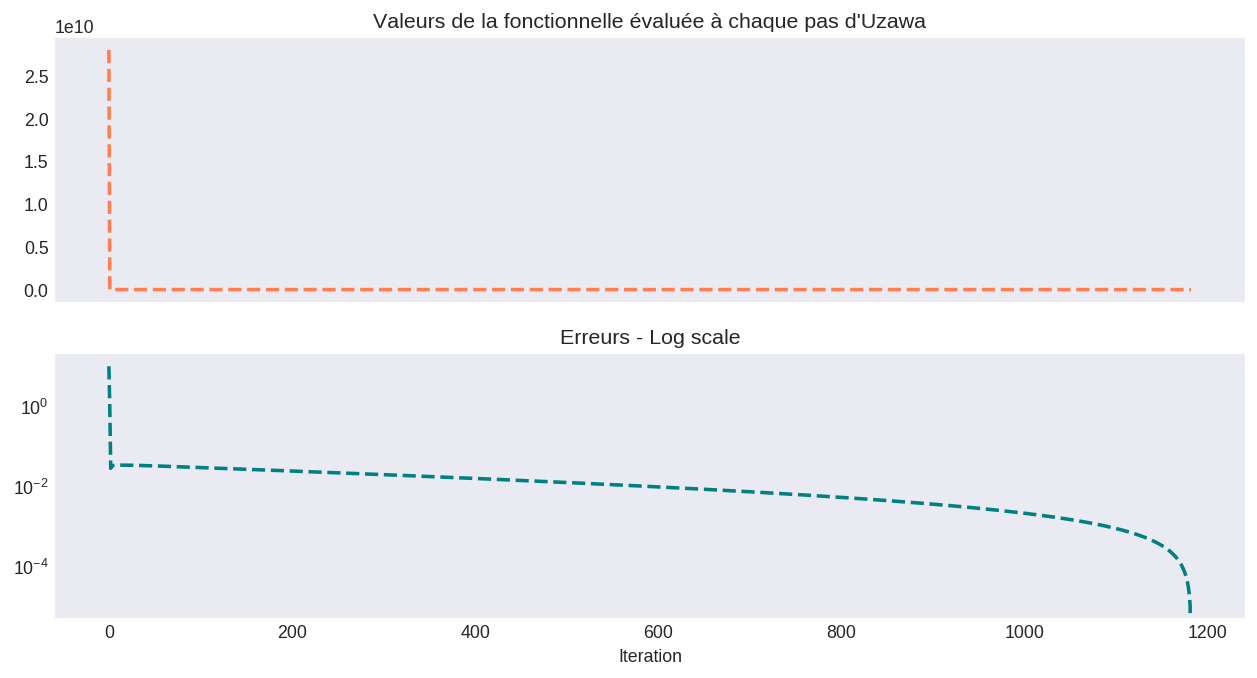

In [0]:
u0 = np.random.normal(size=N)
u_opt, js = Uzawa_disc(A, u0, force, obstacle_2, epsilon = 1e-5, plot=True)

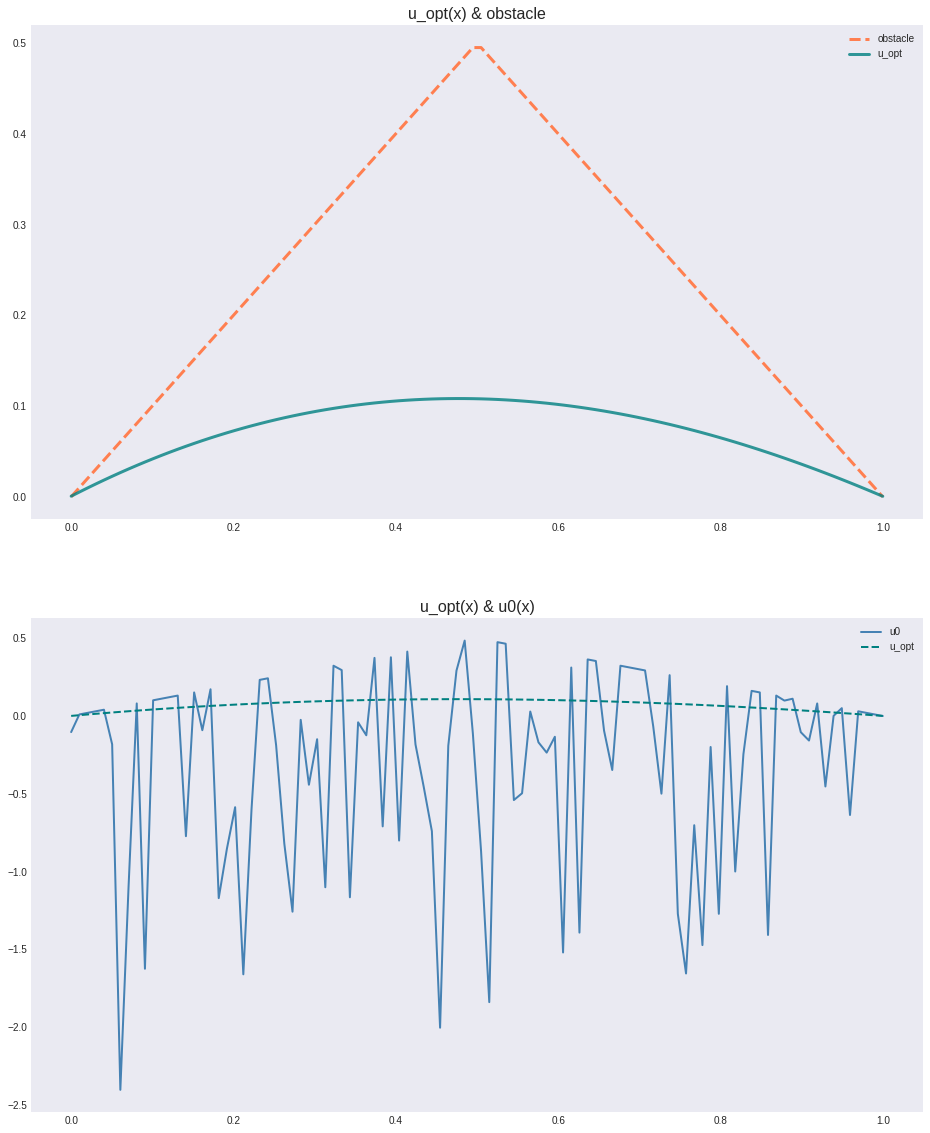

In [0]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 20))
xx = np.array(np.linspace(0, l, N))

ax1.set_title("u_opt(x) & obstacle", fontsize=16)
ax1.plot(xx, obstacle_2(xx), "--", linewidth=3, label='obstacle', color='coral');
ax1.plot(xx, u_opt, linewidth=3, label='u_opt', color='teal', alpha=0.8);
ax1.legend();

ax2.set_title("u_opt(x) & u0(x)", fontsize=16)
ax2.plot(xx, projection(u0, obstacle_2(xx)), linewidth=2, label='u0', color='steelblue');
ax2.plot(xx, u_opt, "--", linewidth=2, label='u_opt', color='teal');
ax2.legend();

#### Test 3 - Por les fonctions force_2, obstacle_1 et matrice A

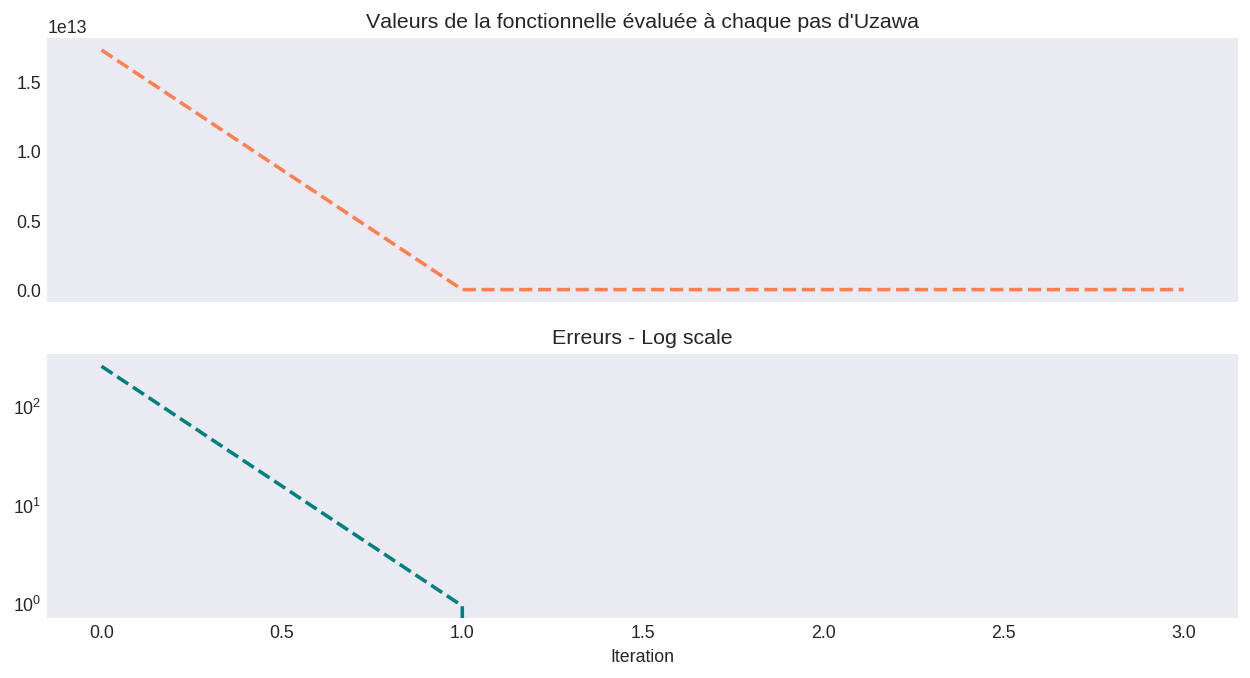

In [0]:
u0 = np.random.normal(size=N)*25
u_opt, js = Uzawa_disc(A, u0, force_2, obstacle_1, epsilon = 1e-7, plot=True)

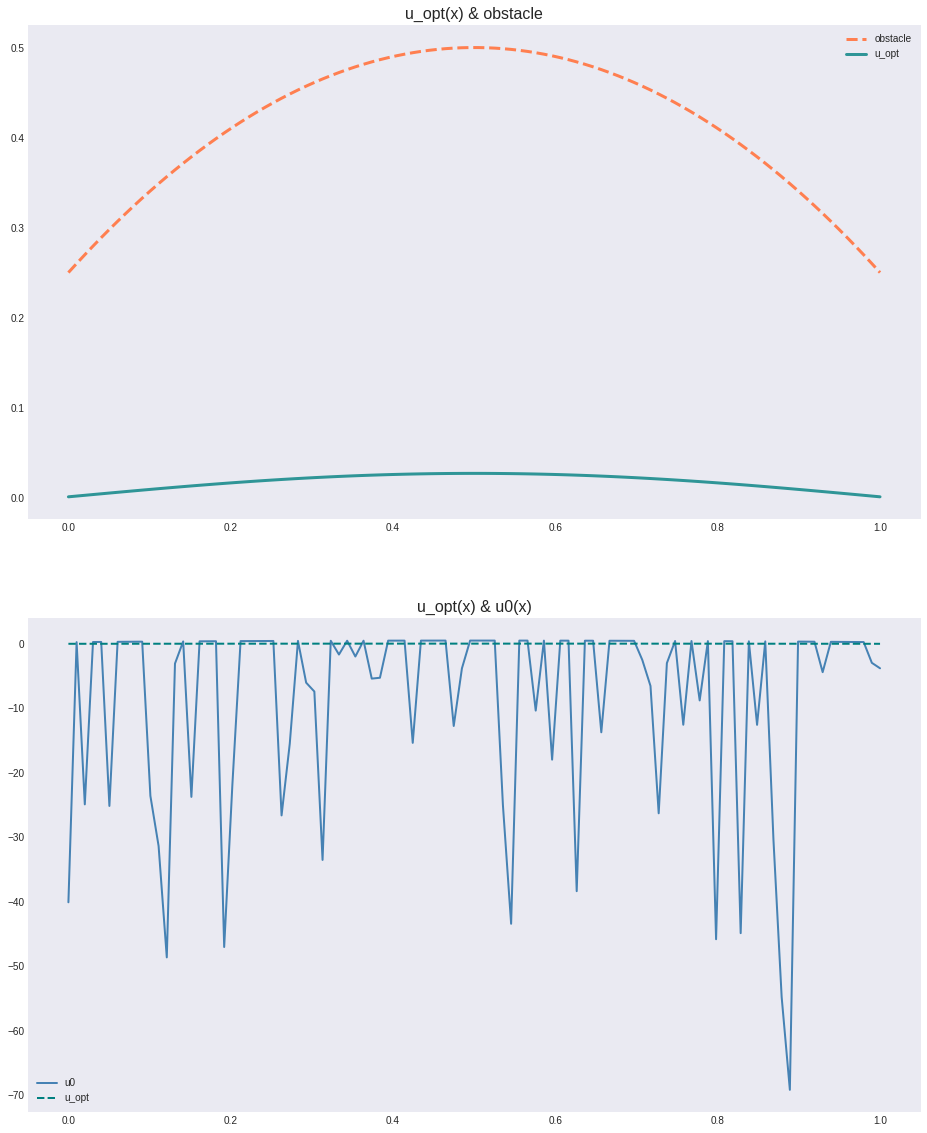

In [0]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 20))
xx = np.array(np.linspace(0, l, N))

ax1.set_title("u_opt(x) & obstacle", fontsize=16)
ax1.plot(xx, obstacle_1(xx), "--", linewidth=3, label='obstacle', color='coral');
ax1.plot(xx, u_opt, linewidth=3, label='u_opt', color='teal', alpha=0.8);
ax1.legend();

ax2.set_title("u_opt(x) & u0(x)", fontsize=16)
ax2.plot(xx, projection(u0, obstacle_1(xx)), linewidth=2, label='u0', color='steelblue');
ax2.plot(xx, u_opt, "--", linewidth=2, label='u_opt', color='teal');
ax2.legend();

#### Test 4 - Pour les fonctions J_Y, force_1, obstacle_0


[Minimization epoch 20] >>> target function value is 6.3964.
[Minimization epoch 40] >>> target function value is 1.2018.
[Minimization epoch 60] >>> target function value is 0.2894.
[Minimization epoch 80] >>> target function value is 0.2130.
[Minimization epoch 100] >>> target function value is 0.1706.
[Minimization epoch 120] >>> target function value is 0.1408.
[Minimization epoch 140] >>> target function value is 0.0270.
[Minimization epoch 160] >>> target function value is 0.0217.
[Minimization epoch 180] >>> target function value is 0.0186.
[Minimization epoch 200] >>> target function value is 0.0165.
[Minimization epoch 220] >>> target function value is 0.0148.
[Minimization epoch 240] >>> target function value is 0.0134.
[Minimization epoch 260] >>> target function value is 0.0122.
[Minimization epoch 280] >>> target function value is 0.0112.
[Minimization epoch 300] >>> target function value is 0.0102.
[Minimization epoch 320] >>> target function value is 0.0094.
[Minimizatio

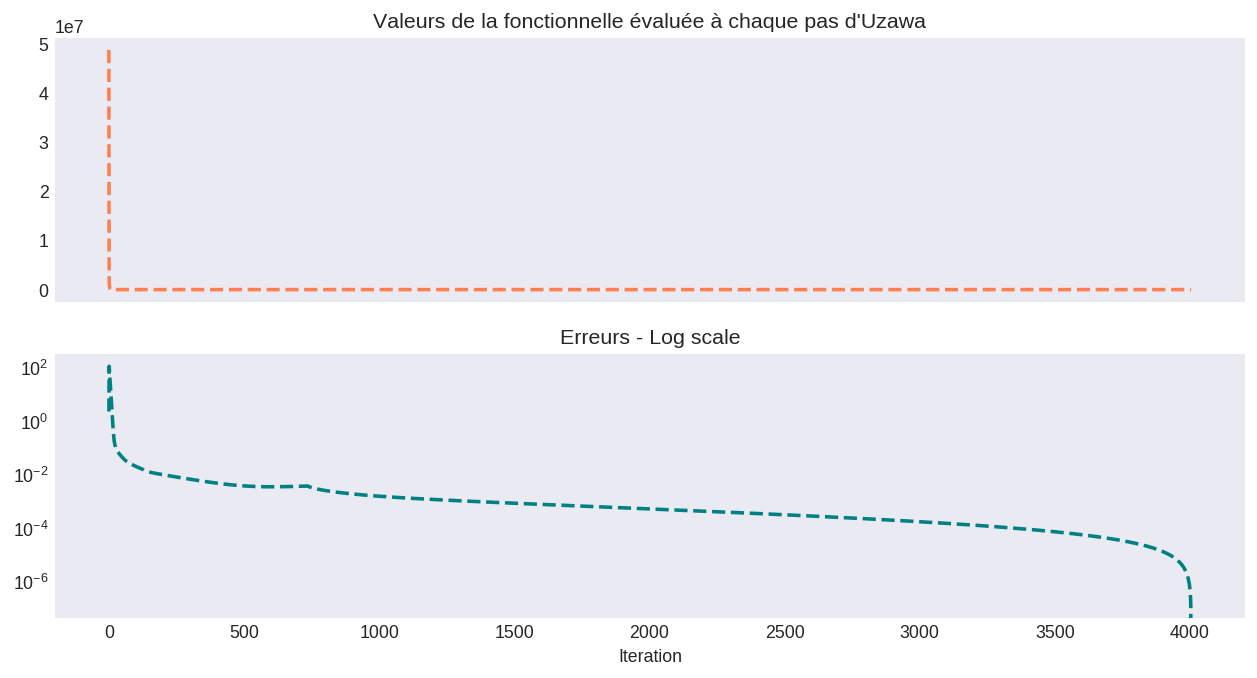

In [0]:
u0 = np.ones(N)*.5
u0[0] = u0[-1] = 0
u_opt, js = Uzawa_disc(A, u0, force_1, obstacle_0, epsilon = 1e-7, plot=True)

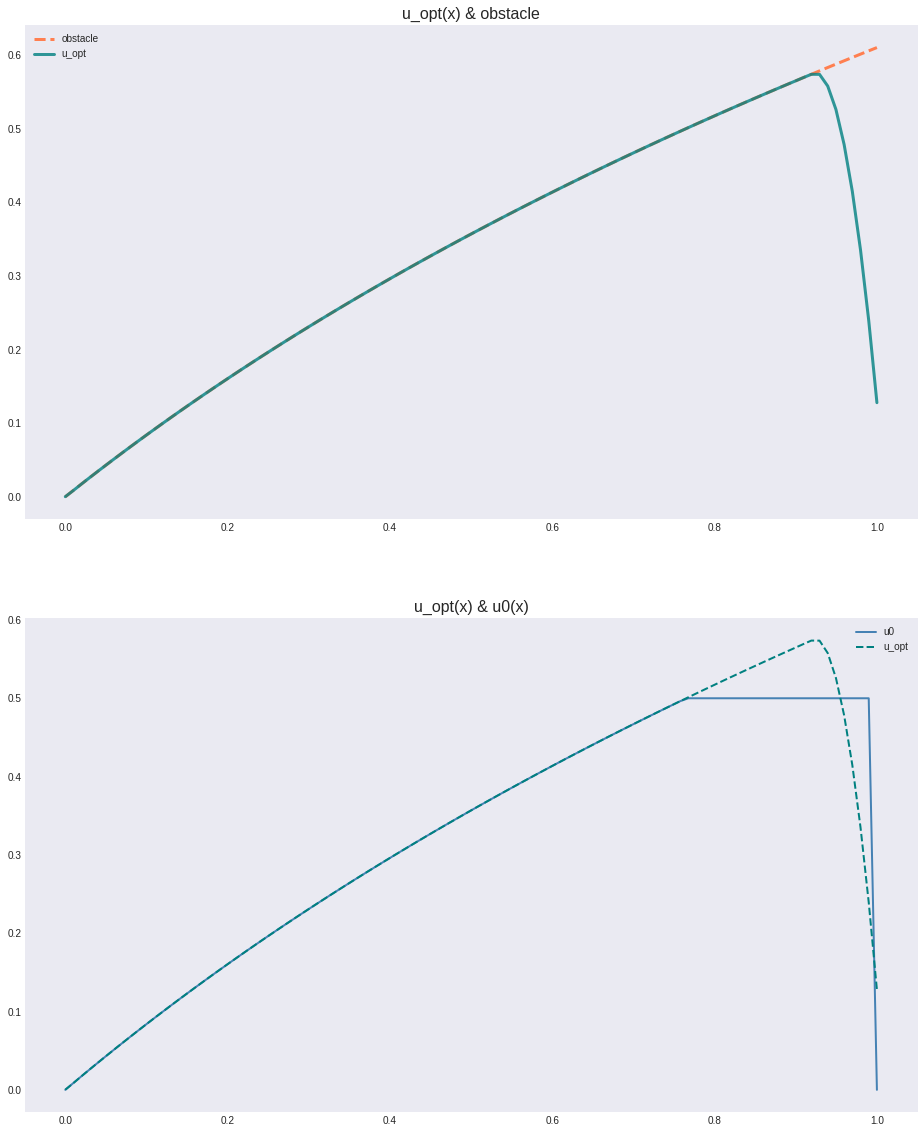

In [0]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 20))
xx = np.array(np.linspace(0, l, N))

ax1.set_title("u_opt(x) & obstacle", fontsize=16)
ax1.plot(xx, obstacle_0(xx), "--", linewidth=3, label='obstacle', color='coral');
ax1.plot(xx, u_opt, linewidth=3, label='u_opt', color='teal', alpha=0.8);
ax1.legend();

ax2.set_title("u_opt(x) & u0(x)", fontsize=16)
ax2.plot(xx, projection(u0, obstacle_0(xx)), linewidth=2, label='u0', color='steelblue');
ax2.plot(xx, u_opt, "--", linewidth=2, label='u_opt', color='teal');
ax2.legend();

***Commentaire:***
On conclut que la méthode d'Uzawa (du moins sa version vectorisée) converge plus rapidement et plus près de la solution optimale. La solution obtenue est aussi plus régulière que dans le cas de la méthode du gradient projeté.

En outre, nous confirmons que les deux méthodes produisent les mêmes solutions au problème et qu'elles ont donc été, très probablement, mises en œuvre correctement.

---
---

## 4. Finalement, si on veut adapter l’algorithme 
pour résoudre le problème $(1)$ 
lorsque

$$
C=\left\{u \in H_{0}^{1}(0,1) | u(x) \geq h(x) \text { p.p. dans }\right] 0,[\}1
$$

Il faut changer les fonctions correspondantes à cette contrainte:

* Ce sera la fonction "projection" pour l'algo de gradient projeté, elle va être remplacée par "projection_ada";
* Pour la méthode d'Uzawa il faudra changer l'expression (x_new - obs) par (obs - x_new)
et l'expression (f_ev - lambs) par (f_ev + lambs)



In [0]:
def Gradient_Proj_Ada(N, p, x0, func, obstacle, epsilon = 0.001, Iterations = 4004, 
                  plot = False, print_epoch = 10):
    # initialisation
    x_old = np.random.normal(size = N)
    x_new = x0
    i = 0
    route = [func(x0)]
    routeX = np.array([x0])
    
    # espace de travail
    space = np.array(np.linspace(0, l, N))
    # evaluation de l'obstacle
    obs = obstacle(space)

    
    # la boucle principal
    while np.linalg.norm(x_old-x_new) > epsilon and i < Iterations:
        x_old = np.copy(x_new)           
        d = -1*gradient_H1_0(func, x_old)
        x_new = x_old + p*d
        x_new = projection_ada(x_new, obs)
        
        route.append(func(x_new))
        routeX = np.concatenate((routeX, [x_new]))
        i+=1
        if i%print_epoch == 0:
            print("[Minimization epoch {:d}] >>> target function value is {:.4f}.".format(i, route[i]))
    
    # plot pour voir la route du gradient
    if plot:
        i+=1
        # on calcule les erreurs sur chaque pas
        errors = np.zeros(i)
        for k in range(i):
            errors[k] = np.linalg.norm(routeX[k] - x_new)      
        
        xx = np.arange(0, i, 1)
        
        fig,axs = plt.subplots(2, 1, figsize = (12, 6), dpi = 128, sharex = True)
        axs[0].set_title("Valeurs de la fonctionnelle "
                         "évaluée à chaque pas de gradient projeté")
        axs[0].plot(xx, route, "--", color = "coral", linewidth = 2)
        axs[1].set_title("Erreurs - Log scale")
        axs[1].set_yscale("log")
        axs[1].plot(xx, errors, "--", color = "teal", linewidth = 2)
        plt.xlabel("Iteration");
    
    return x_new, route

[Minimization epoch 10] >>> target function value is 45.8987.
[Minimization epoch 20] >>> target function value is 44.5473.
[Minimization epoch 30] >>> target function value is 44.2673.


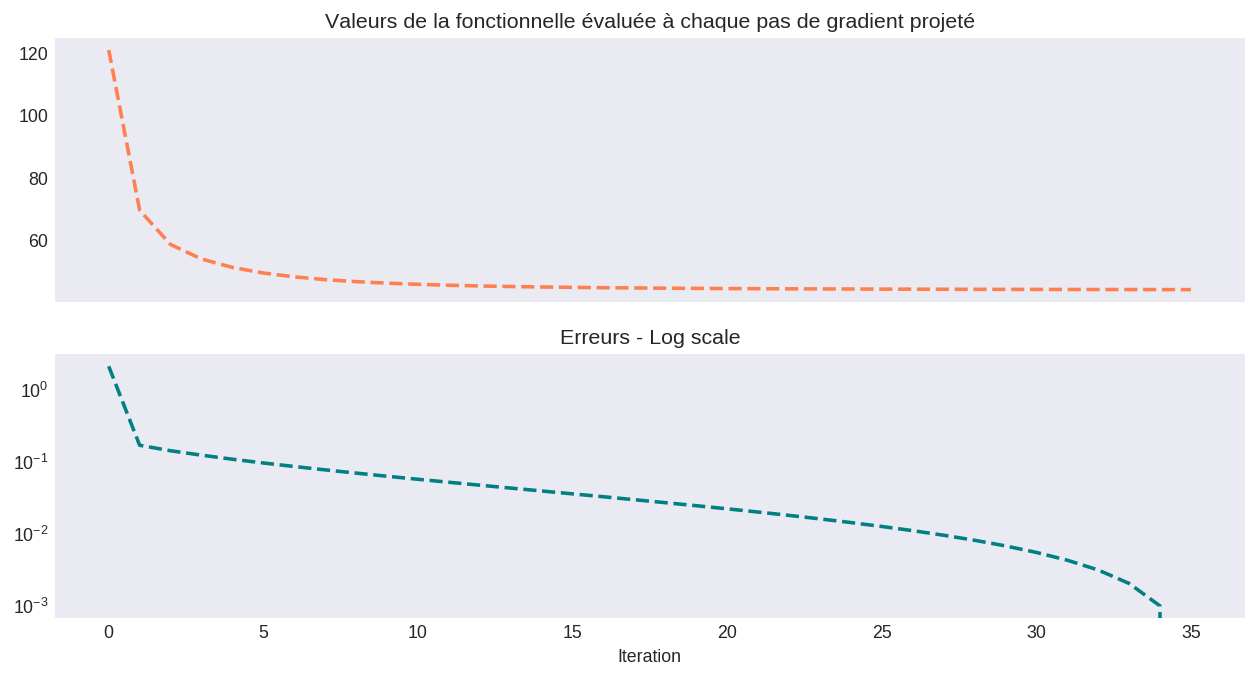

In [0]:
# initialisation de u
u0 = np.ones(N)*.1
u0[0] = u0[-1] = 0
lr = 0.0001
u_opt, js = Gradient_Proj_Ada(N, lr, u0, J_A, obstacle_2, epsilon = 0.001, Iterations = 4004, plot = True)

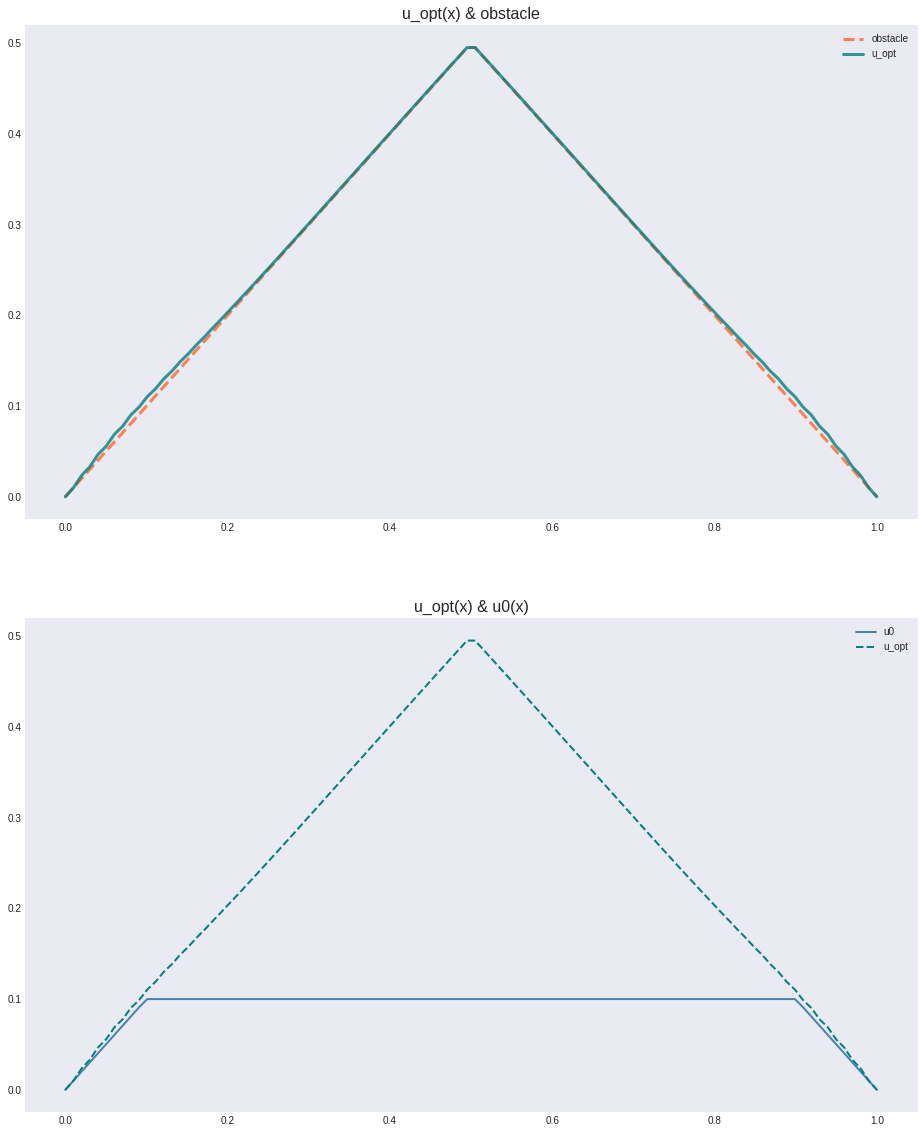

In [0]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 20))
xx = np.array(np.linspace(0, l, N))

ax1.set_title("u_opt(x) & obstacle", fontsize=16)
ax1.plot(xx, obstacle_2(xx), "--", linewidth=3, label='obstacle', color='coral');
ax1.plot(xx, u_opt, linewidth=3, label='u_opt', color='teal', alpha=0.8);
ax1.legend();

ax2.set_title("u_opt(x) & u0(x)", fontsize=16)
ax2.plot(xx, projection(u0, obstacle_2(xx)), linewidth=2, label='u0', color='steelblue');
ax2.plot(xx, u_opt, "--", linewidth=2, label='u_opt', color='teal');
ax2.legend();

In [0]:
def Uzawa_disc_Ada(A, x0, f, obstacle, epsilon = 1e-5, Iterations = 4004, 
               print_epoch=20, plot = False):
    # initialisation
    N = len(x0)
    lambs = np.ones(N)
    # on adapt ro à N
    #ro = np.abs(J(x0))/np.linalg.norm(x0)
    ro = 16
    i = 0
    x_old = np.random.normal(size = N)
    x_new = x0

    # espace de travail
    space = np.array(np.linspace(0, l, N))
    # evaluation de la force
    f_ev = f(space)
    # evaluation de l'obstacle
    obs = obstacle(space)

    A_inv = np.linalg.inv(A)

    def JB(x, l):
        return 1/2*np.linalg.norm(A@x - f_ev - l)**2
    
    # pour plot
    route = [JB(x0, lambs)]
    routeX = np.array([x0])
    try:
        # la boucle principal
        while i < Iterations and np.linalg.norm(x_new-x_old) > epsilon:
            x_old = np.copy(x_new)

            # min sur x
            x_new = A_inv@(f_ev + lambs)
            # max sur lambda
            lambs = np.maximum(lambs + ro*(obs - x_new), 0)

            route.append(JB(x_new, lambs))
            routeX = np.concatenate((routeX, [x_new]))   
            i+=1

            if i % print_epoch == 0:
                print("[Minimization epoch {:d}] >>> target function value is {:.4f}.".format(i, route[i]))
    except KeyboardInterrupt:
        print("L'algorithme est arrêté à l'itération {:d}".format(i))
        
    # plot pour voir la route de la méthode
    if plot:
        i+=1
        # on calcule les erreurs sur chaque pas
        errors = np.zeros(i)
        for k in range(i):
            errors[k] = np.linalg.norm(routeX[k] - x_new)      
        
        xx = np.arange(0, i, 1)
        
        fig,axs = plt.subplots(2, 1, figsize = (12, 6), dpi =128, sharex = True)
        axs[0].set_title("Valeurs de la fonctionnelle "
                            "évaluée à chaque pas d'Uzawa")
        axs[0].plot(xx, route, "--", color = "coral", linewidth = 2)
        axs[1].set_title("Erreurs - Log scale")
        axs[1].set_yscale("log")
        axs[1].plot(xx, errors, "--", color = "teal", linewidth = 2)
        plt.xlabel("Iteration");
        
    return x_new, route

[Minimization epoch 20] >>> target function value is 0.4088.
[Minimization epoch 40] >>> target function value is 0.1338.
[Minimization epoch 60] >>> target function value is 0.0783.
[Minimization epoch 80] >>> target function value is 0.0470.
[Minimization epoch 100] >>> target function value is 0.0334.
[Minimization epoch 120] >>> target function value is 0.0239.
[Minimization epoch 140] >>> target function value is 0.0215.
[Minimization epoch 160] >>> target function value is 0.0156.
[Minimization epoch 180] >>> target function value is 0.0106.
[Minimization epoch 200] >>> target function value is 0.0097.
[Minimization epoch 220] >>> target function value is 0.0091.
[Minimization epoch 240] >>> target function value is 0.0085.
[Minimization epoch 260] >>> target function value is 0.0080.
[Minimization epoch 280] >>> target function value is 0.0075.
[Minimization epoch 300] >>> target function value is 0.0070.
[Minimization epoch 320] >>> target function value is 0.0052.
[Minimizatio

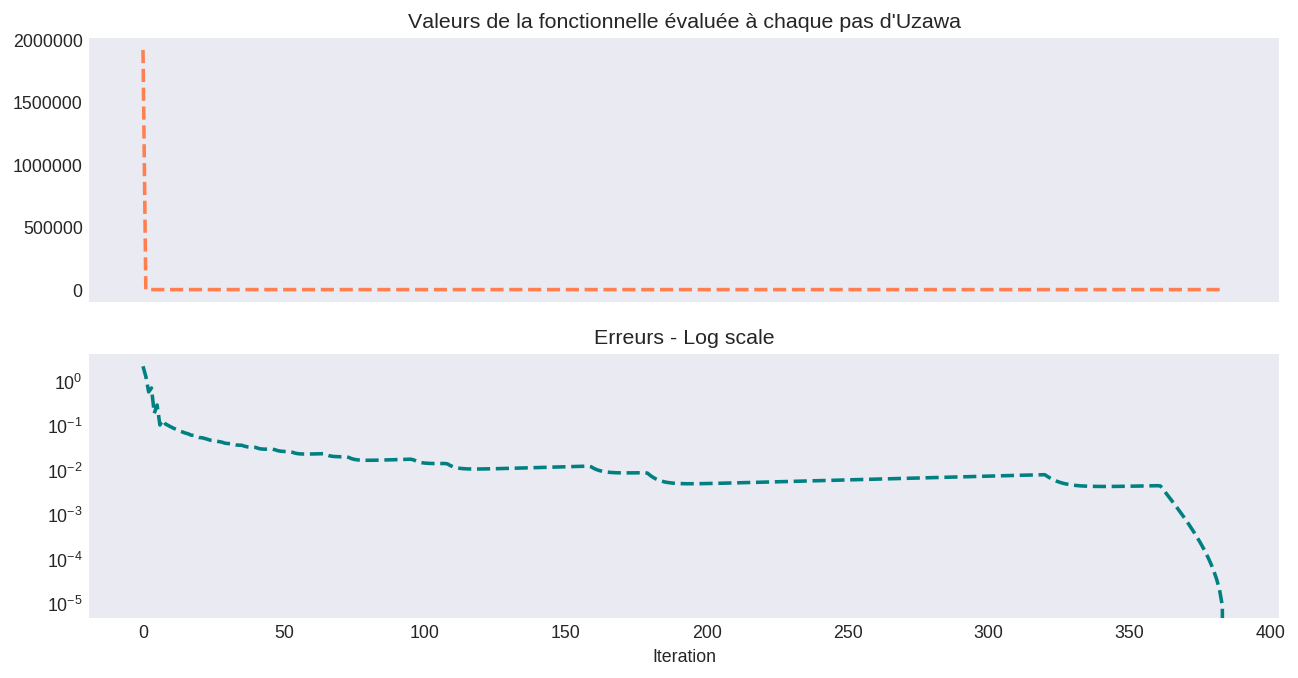

In [0]:
u_opt, js = Uzawa_disc_Ada(A, u0, force, obstacle_2, epsilon = 1e-5, plot=True)

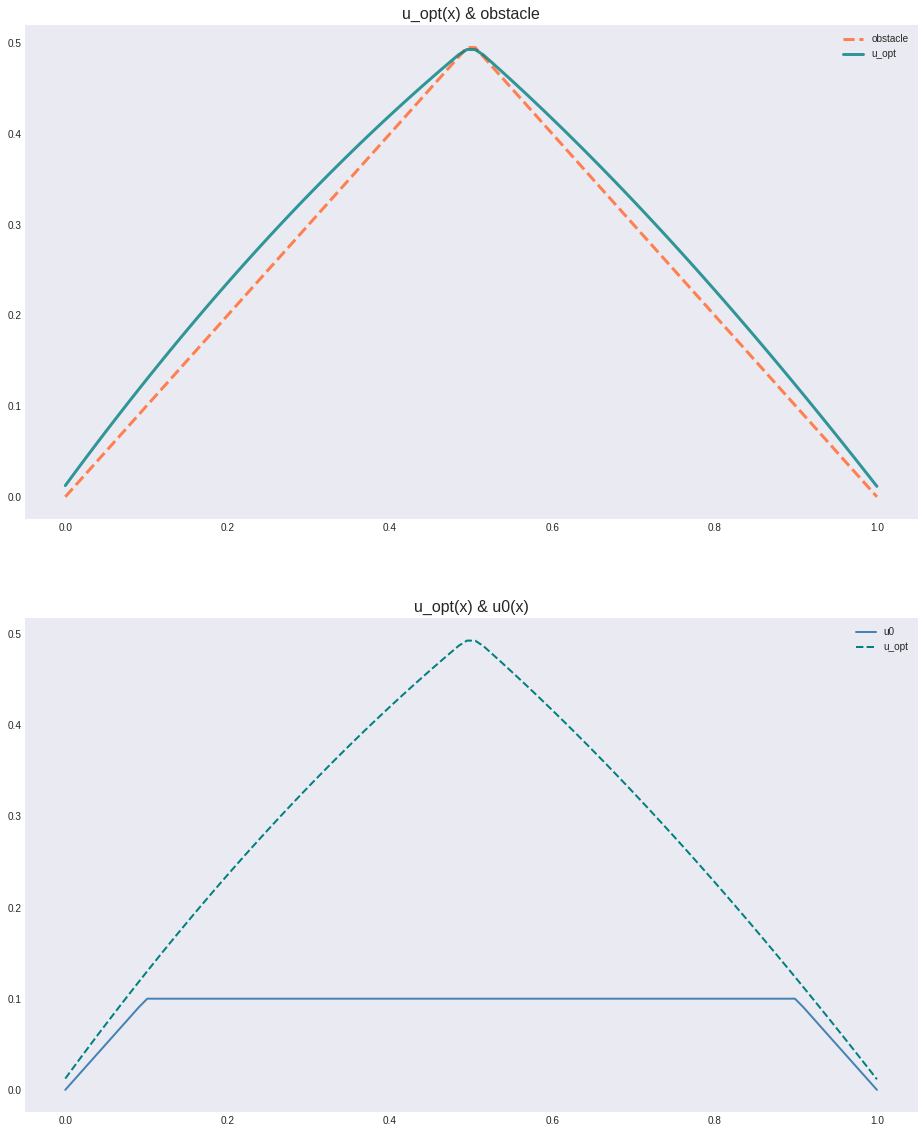

In [0]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 20))
xx = np.array(np.linspace(0, l, N))

ax1.set_title("u_opt(x) & obstacle", fontsize=16)
ax1.plot(xx, obstacle_2(xx), "--", linewidth=3, label='obstacle', color='coral');
ax1.plot(xx, u_opt, linewidth=3, label='u_opt', color='teal', alpha=0.8);
ax1.legend();

ax2.set_title("u_opt(x) & u0(x)", fontsize=16)
ax2.plot(xx, projection(u0, obstacle_2(xx)), linewidth=2, label='u0', color='steelblue');
ax2.plot(xx, u_opt, "--", linewidth=2, label='u_opt', color='teal');
ax2.legend();

***Commentaire:*** On peut clairement voir que les deux méthodes fonctionnent encore correctement et donnent des résultats similaires.
- - -
- - -

## Conclusion

*Pour conclure, on a vu comment le problème initial $\mathcal{P}$ peut être représenté sous ses différentes formes, cependant équivalentes, et comment il peut être utile en fonction de la tâche. On a également étudié et expérimenté les difficultés d'implémentation des algorithmes d'optimisation sous contraintes.*

*Deux méthodes proposées - le gradient projeté et la méthode d'Uzawa - ont été mises en œuvre et testées. Il a été démontré qu'elles donnent des résultats proches, mais pas toujours exactement égaux. De plus, on a vu que la version discrétisée et vectorisée d'Uzawa est beaucoup plus rapide et efficace, alors que la résolution directe utilisant cette méthode n'atteint pas la convergence dans un délai raisonnable.*

*Enfin, les deux méthodes sont mises en œuvre de telle sorte qu'elles sont capables de fonctionner avec différentes fonctions de coût, d'obstacle et de force. En cas de besoin d'un type de variation différent, elles peuvent être facilement adaptées.*